# CMU Movies Summary Corpus

- Authors: Zaynab, Lylia, Ali, Christian, Yassin

---

## Tasks

1. **Select Project & Initial Analyses**:
   1. Agree on a project proposal with team members.
   2. Perform initial analyses to verify feasibility of the proposed project, including any additional data.
   3. Acquaint yourself with the provided data, preprocess it, and perform descriptive statistics.

2. **Pipeline & Data Description**:
   1. Create a pipeline for data handling and preprocessing, documented in the notebook.
   2. Describe the relevant aspects of the data, including:
      1. Handling the size of the data.
      2. Understanding the data (formats, distributions, missing values, correlations, etc.).
      3. Considering data enrichment, filtering, and transformation according to project needs.
   3. Develop a plan for methods to be used, with essential mathematical details.
   4. Outline a plan for analysis and communication, discussing alternative approaches considered.

3. **GitHub Repository & Deliverables**:
   1. Create a public GitHub repository named `ada-2023-project-<team>` under the `epfl-ada` GitHub organization. ✅
   2. Ensure the repository contains:
      1. **README.md** file with:
         1. **Title**: Project title.
         2. **Abstract**: 150-word description of the project idea, goals, and motivation.
         3. **Research Questions**: List of research questions to address.
         4. **Proposed Additional Datasets**: Description of additional datasets, expected management, and feasibility analysis.
         5. **Methods**: Methods to be used in the project.
         6. **Proposed Timeline**: Timeline for the project.
         7. **Organization within the Team**: Internal milestones leading to Milestone P3.
         8. **Questions for TAs (optional)**: Any questions for the teaching assistants.
      2. **Code for Initial Analyses**: Structured code for initial analyses and data handling pipelines.
      3. **Notebook** presenting initial results, including:
         1. Main results and descriptive analysis.
         2. External scripts/modules for implementing core logic, to be called from the notebook.

---


## Table of Contents
- [1. Zaynab's part](##Zaynab's-part)
- [2. Lylia's part](##Lylia's-part)
- [3. Ali's part](##Ali's-part)
- [4. Cristians's part](##Christian's-part)
- [5. Yassin's part](##Yassin's-part)

---

### Library importation

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### data importation

In [2]:
DATA_PATH='./data/MovieSummaries/'

### movie metadata

In [3]:
movie_columns = [
    'WikipediaMovieID', 'FreebaseMovieID', 'MovieName', 'ReleaseDate', 
    'BoxOfficeRevenue', 'Runtime', 'Languages', 'Countries', 'Genres'
]


movie_metadata = pd.read_csv(DATA_PATH+'movie.metadata.tsv', sep='\t', names=movie_columns)

movie_metadata

,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


we adapt the format for the release dates :

In [4]:
movie_metadata['ReleaseDate']= movie_metadata['ReleaseDate'].str.extract(r'(\d{4})')
movie_metadata['ReleaseDate'] = movie_metadata['ReleaseDate'].astype(float)

movie_metadata

,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011.0,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011.0,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972.0,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992.0,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


What's the range?

In [5]:
miny_t = movie_metadata['ReleaseDate'].min()
maxy_t = movie_metadata['ReleaseDate'].max()
print('We have now data about movies from', miny_t, 'to', maxy_t)

We have now data about movies from 1010.0 to 2016.0


In [6]:
rows_with_1010 = movie_metadata[movie_metadata['ReleaseDate'] == 1010]

print(rows_with_1010)
print(rows_with_1010.index)


       WikipediaMovieID FreebaseMovieID       MovieName  ReleaseDate  \
62836          29666067      /m/0fphzrf  Hunting Season       1010.0   

       BoxOfficeRevenue  Runtime  \
62836        12160978.0    140.0   

                                               Languages  \
62836  {"/m/02hwyss": "Turkish Language", "/m/02h40lc...   

                     Countries  \
62836  {"/m/01znc_": "Turkey"}   

                                                  Genres  
62836  {"/m/0lsxr": "Crime Fiction", "/m/02n4kr": "My...  
Index([62836], dtype='int64')


The movie Hunting Season was released in 2010 and not 1010. We correct the error.

In [7]:
movie_metadata.at[62836, 'ReleaseDate'] = 2010 


Here, we acknowledge that the data could contain other errors, as every dataset can contain some kind of noise. We removed this outlier but we keep this in mind. If we notice any other weird tendencies, we could verify if it is not due to noise

In [8]:
miny = movie_metadata['ReleaseDate'].min()
maxy = movie_metadata['ReleaseDate'].max()
print('We have data about movies from', miny, 'to', maxy)

We have data about movies from 1888.0 to 2016.0


### character metadata

In [9]:
character_columns = [
    'WikipediaMovieID', 'FreebaseMovieID', 'ReleaseDate', 'CharacterName',
    'ActorDOB', 'ActorGender', 'ActorHeight', 'ActorEthnicity', 
    'ActorName', 'ActorAgeAtRelease', 'FreebaseCharacterActorMapID',
    'FreebaseCharacterID', 'FreebaseActorID'
]

character_metadata = pd.read_csv(DATA_PATH+'character.metadata.tsv', sep='\t', names=character_columns)


character_metadata

,WikipediaMovieID,FreebaseMovieID,ReleaseDate,CharacterName,ActorDOB,ActorGender,ActorHeight,ActorEthnicity,ActorName,ActorAgeAtRelease,FreebaseCharacterActorMapID,FreebaseCharacterID,FreebaseActorID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [10]:
character_metadata['ReleaseDate']=character_metadata['ReleaseDate'].str.extract(r'(\d{4})')
character_metadata['ReleaseDate'] = character_metadata['ReleaseDate'].astype(float)

character_metadata

,WikipediaMovieID,FreebaseMovieID,ReleaseDate,CharacterName,ActorDOB,ActorGender,ActorHeight,ActorEthnicity,ActorName,ActorAgeAtRelease,FreebaseCharacterActorMapID,FreebaseCharacterID,FreebaseActorID
0,975900,/m/03vyhn,2001.0,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001.0,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001.0,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001.0,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001.0,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992.0,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992.0,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957.0,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957.0,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [11]:
# Count the total number of rows
total_rows = character_metadata.shape[0]

# Count the number of unique ActorName entries
unique_actor_names = character_metadata['ActorName'].nunique()

# Check for uniqueness
if total_rows == unique_actor_names:
    print("ActorName values are unique.")
else:
    print(f"ActorName values are not unique. There are {total_rows - unique_actor_names} duplicate names.")

ActorName values are not unique. There are 316591 duplicate names.


In [12]:
# Create a copy of the original DataFrame
character_metadata0 = character_metadata.copy()


# Drop rows with NaT in 'ReleaseDate' to avoid issues with min/max
character_metadata0 = character_metadata0.dropna(subset=['ReleaseDate'])

# Get the minimum and maximum release dates
min_date = character_metadata0['ReleaseDate'].min()
max_date = character_metadata0['ReleaseDate'].max()

print(f"Lower bound (earliest release date): {min_date}")
print(f"Upper bound (latest release date): {max_date}")

Lower bound (earliest release date): 1010.0
Upper bound (latest release date): 2016.0


In [13]:
character_metadata['ActorName'].value_counts()

ActorName
Mel Blanc             791
Mithun Chakraborty    328
Oliver Hardy          299
Mohanlal              234
Moe Howard            225
                     ... 
Jan van der Horst       1
Irma Lozin              1
Johan Gildemeijer       1
Jan Feith               1
Roberta Paterson        1
Name: count, Length: 134078, dtype: int64

In [14]:
rows_character_1010 =character_metadata[character_metadata['ReleaseDate']==1010]
print(rows_character_1010)

       WikipediaMovieID FreebaseMovieID  ReleaseDate   CharacterName  \
67624          29666067      /m/0fphzrf       1010.0         Kamuran   
67625          29666067      /m/0fphzrf       1010.0          Ferman   
67626          29666067      /m/0fphzrf       1010.0           Idris   
67627          29666067      /m/0fphzrf       1010.0           Hasan   
67628          29666067      /m/0fphzrf       1010.0          Battal   
67629          29666067      /m/0fphzrf       1010.0           Asiye   
67630          29666067      /m/0fphzrf       1010.0       Asit Omer   
67631          29666067      /m/0fphzrf       1010.0           Hatun   
67632          29666067      /m/0fphzrf       1010.0          Müslüm   
67633          29666067      /m/0fphzrf       1010.0      Murat Önes   
67634          29666067      /m/0fphzrf       1010.0           Hilal   
67635          29666067      /m/0fphzrf       1010.0         Cevriye   
67636          29666067      /m/0fphzrf       1010.0        Müze

In [15]:
character_metadata['ReleaseDate'].describe()

count    440674.000000
mean       1984.489929
std          25.889522
min        1010.000000
25%        1969.000000
50%        1994.000000
75%        2005.000000
max        2016.000000
Name: ReleaseDate, dtype: float64

In [16]:
character_metadata.loc[character_metadata['ReleaseDate'] == 1010, 'ReleaseDate'] = 2010

In [17]:
character_metadata['ReleaseDate'].describe()

count    440674.000000
mean       1984.523968
std          25.257949
min        1888.000000
25%        1969.000000
50%        1994.000000
75%        2005.000000
max        2016.000000
Name: ReleaseDate, dtype: float64

In [18]:

rows_character_1010 =character_metadata[character_metadata['ReleaseDate']==1010]
print(rows_character_1010)

Empty DataFrame
Columns: [WikipediaMovieID, FreebaseMovieID, ReleaseDate, CharacterName, ActorDOB, ActorGender, ActorHeight, ActorEthnicity, ActorName, ActorAgeAtRelease, FreebaseCharacterActorMapID, FreebaseCharacterID, FreebaseActorID]
Index: []


### plot summaries

In [19]:
plot_columns = ['WikipediaMovieID', 'PlotSummary']

plot_summaries = pd.read_csv(DATA_PATH+'plot_summaries.txt', sep='\t', names=plot_columns)

plot_summaries


,WikipediaMovieID,PlotSummary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho..."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42300,35102018,American Luthier focuses on Randy Parsons’ tra...
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


### Verifying the matching between **movie_metadata** and **plot_summaries**

In [20]:
# Verify if all WikipediaMovieID in plot_summaries are also in movie_metadata
all_ids_in_metadata = plot_summaries['WikipediaMovieID'].isin(movie_metadata['WikipediaMovieID']).all()

print(f"All WikipediaMovieID in plot_summaries are in movie_metadata: {all_ids_in_metadata}")

All WikipediaMovieID in plot_summaries are in movie_metadata: False


In [21]:
# Calculate the percentage of common WikipediaMovieID between plot_summaries and movie_metadata
common_ids_count = plot_summaries['WikipediaMovieID'].isin(movie_metadata['WikipediaMovieID']).sum()
percentage_common_ids = (common_ids_count / len(plot_summaries)) * 100

print(f"Percentage of common WikipediaMovieID between plot_summaries and movie_metadata: {percentage_common_ids:.2f}%")
print(common_ids_count)
print(len(plot_summaries))
print(len(movie_metadata))

Percentage of common WikipediaMovieID between plot_summaries and movie_metadata: 99.77%
42204
42303
81741


--> Almost all the movies in plot_summaries are in movie_metadata

Let's add the plots to the movies

In [22]:
movie_metadata = pd.merge(movie_metadata, plot_summaries, on='WikipediaMovieID', how='left')
movie_metadata

,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres,PlotSummary
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",NaN
2,28463795,/m/0crgdbh,Brun bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",NaN
3,9363483,/m/0285_cd,White Of The Eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...
4,261236,/m/01mrr1,A Woman in Flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra..."
...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011.0,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",Two former National Oceanic Atmospheric Admini...
81737,34980460,/m/0g4pl34,Knuckle,2011.0,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",{{No plot}} This film follows 12 years in the ...
81738,9971909,/m/02pygw1,Another Nice Mess,1972.0,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",NaN
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992.0,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...","The story takes place in the year 2092,The Sup..."


Let's drop duplicates:

In [23]:
movie_metadata.drop_duplicates(subset='MovieName', keep='first', inplace=True)
movie_metadata.shape[0]

75478

### name clusters

In [24]:
name_clusters_columns = ['CharacterName', 'FreebaseCharacterActorMapID']

name_clusters = pd.read_csv(DATA_PATH+'name.clusters.txt', sep='\t', names=name_clusters_columns)

name_clusters


,CharacterName,FreebaseCharacterActorMapID
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn
...,...,...
2661,John Rolfe,/m/0k5_ql
2662,John Rolfe,/m/02vd6vs
2663,Elizabeth Swann,/m/0k1xvz
2664,Elizabeth Swann,/m/0k1x_d


### TV tropes clusters

In [25]:
tvtropes_columns = ['CharacterType', 'FreebaseCharacterActorMapID']

tvtropes_clusters = pd.read_csv(DATA_PATH+'tvtropes.clusters.txt', sep='\t', names=tvtropes_columns)

tvtropes_clusters


,CharacterType,FreebaseCharacterActorMapID
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."
...,...,...
496,young_gun,"{""char"": ""Morgan Earp"", ""movie"": ""Tombstone"", ..."
497,young_gun,"{""char"": ""Colorado Ryan"", ""movie"": ""Rio Bravo""..."
498,young_gun,"{""char"": ""Tom Sawyer"", ""movie"": ""The League of..."
499,young_gun,"{""char"": ""William H. 'Billy the Kid' Bonney"", ..."


We first extract the ID and then merge on it. We want to make it out of the FreebaseCharacterActorMapID for easier manipulation later in our project.

In [26]:
import json
tvtropes_clusters['FreebaseCharacterActorMapID'] = tvtropes_clusters['FreebaseCharacterActorMapID'].apply(json.loads)

In [27]:
tvtropes_clusters['ID'] = None
for index, row in tvtropes_clusters.iterrows():
    tvtropes_clusters['ID'][index] = tvtropes_clusters['FreebaseCharacterActorMapID'][index].get('id')

/var/folders/pq/vs1ny6651qz1x3k8m4bz09m40000gn/T/ipykernel_71877/1936035619.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tvtropes_clusters['ID'][index] = tvtropes_clusters['FreebaseCharacterActorMapID'][index].get('id')
/var/folders/p

In [28]:
tvtropes_clusters

,CharacterType,FreebaseCharacterActorMapID,ID
0,absent_minded_professor,"{'char': 'Professor Philip Brainard', 'movie':...",/m/0jy9q0
1,absent_minded_professor,"{'char': 'Professor Keenbean', 'movie': 'Richi...",/m/02vchl3
2,absent_minded_professor,"{'char': 'Dr. Reinhardt Lane', 'movie': 'The S...",/m/0k6fkc
3,absent_minded_professor,"{'char': 'Dr. Harold Medford', 'movie': 'Them!...",/m/0k6_br
4,absent_minded_professor,"{'char': 'Daniel Jackson', 'movie': 'Stargate'...",/m/0k3rhh
...,...,...,...
496,young_gun,"{'char': 'Morgan Earp', 'movie': 'Tombstone', ...",/m/0k776f
497,young_gun,"{'char': 'Colorado Ryan', 'movie': 'Rio Bravo'...",/m/0k2kqg
498,young_gun,"{'char': 'Tom Sawyer', 'movie': 'The League of...",/m/0k5nsh
499,young_gun,"{'char': 'William H. 'Billy the Kid' Bonney', ...",/m/03lrjk0


In [29]:
mergedtvchar = pd.merge(tvtropes_clusters, name_clusters, how='right', left_on= 'ID' , right_on='FreebaseCharacterActorMapID')

In [30]:
print(mergedtvchar)

     CharacterType FreebaseCharacterActorMapID_x   ID    CharacterName  \
0              NaN                           NaN  NaN    Stuart Little   
1              NaN                           NaN  NaN    Stuart Little   
2              NaN                           NaN  NaN    Stuart Little   
3              NaN                           NaN  NaN         John Doe   
4              NaN                           NaN  NaN         John Doe   
...            ...                           ...  ...              ...   
2679           NaN                           NaN  NaN       John Rolfe   
2680           NaN                           NaN  NaN       John Rolfe   
2681           NaN                           NaN  NaN  Elizabeth Swann   
2682           NaN                           NaN  NaN  Elizabeth Swann   
2683           NaN                           NaN  NaN  Elizabeth Swann   

     FreebaseCharacterActorMapID_y  
0                        /m/0k3w9c  
1                        /m/0k3wcx  


In [31]:
len (mergedtvchar['ID']) - mergedtvchar['ID'].isna().sum()

101

We only have a small number of Charactertypes assigned but we will keep it for a potential future use.

In [32]:
mergedtvchar.drop(columns=['FreebaseCharacterActorMapID_x', 'FreebaseCharacterActorMapID_y', 'ID'], axis=1, inplace=True)


We'll add both of these to character_metadata

In [33]:
character_metadata = pd.merge(character_metadata, mergedtvchar, how= 'left', on = 'CharacterName')

In [34]:
character_metadata.columns

Index(['WikipediaMovieID', 'FreebaseMovieID', 'ReleaseDate', 'CharacterName',
       'ActorDOB', 'ActorGender', 'ActorHeight', 'ActorEthnicity', 'ActorName',
       'ActorAgeAtRelease', 'FreebaseCharacterActorMapID',
       'FreebaseCharacterID', 'FreebaseActorID', 'CharacterType'],
      dtype='object')

---
---

## Zaynab exploring the feasibility of the problematic : To what extent do cinematic narratives shape real-life events and societal behaviors?


The results made us abandon this idea but here is the exploration. We added a dataset that contained the main world events.

Let's see how it looks !


In [35]:
W_events = pd.read_csv('./data/zaynab/World Important Dates.csv', sep=',')

W_events

,Sl. No,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
0,1,Indus Valley Civilization Flourishes,Unknown,Unknown,2600 BC,India,Civilization,Indus Valley,Development of one of the world's earliest urb...,Local inhabitants,Indus Valley people,Positive
1,2,Battle of the Ten Kings,Unknown,Unknown,1400 BC,India,Battle,Punjab,Rigvedic tribes consolidated their control ove...,Rigvedic tribes,Sudas,Positive
2,6,Establishment of the Delhi Sultanate,Unknown,Unknown,1206,India,Political,Delhi,Muslim rule established in parts of India,People of Delhi and surrounding regions,QutbUnknownudUnknowndin Aibak,Mixed
3,7,Battle of Panipat,21,April,1526,India,Battle,Panipat,Foundation of the Mughal Empire in India,Northern Indian kingdoms,Babur,Mixed
4,8,Establishment of British Raj,1,May,1858,India,Colonial,Whole India,Start of direct British governance in India,Indian subcontinent,British East India Company/Empire,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1147,First Mexican Empire Declared,28,September,1821,Mexico,Political,Mexico,Brief establishment of an empire soon transiti...,Mexicans,Agustín de Iturbide,Positive
1092,1148,U.S.UnknownMexican War,25,April,1846,Mexico,Military,Northern Mexico,Loss of vast territories to the United States,Mexicans,US,Negative
1093,1149,Reform Wars,Unknown,Unknown,1857,Mexico,Civil War,Mexico,Liberal vs. Conservative conflict leading to c...,Mexicans,Benito Juárez,Mixed
1094,1150,French Intervention in Mexico,Unknown,Unknown,1862,Mexico,Military Intervention,Mexico,Establishment and fall of the Second Mexican E...,Mexicans,Napoleon III,Negative



## Cleaning
We will get the crossed time period and remove all the events that are not in the movies time period - I need to clean the movies datasets first


Cleaning W_events baed on years



In [36]:
W_events.loc[:, 'Year'] = W_events['Year'].astype(str)
W_events=W_events[~W_events['Year'].str.contains('BC', na=False)]
W_events


,Sl. No,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
2,6,Establishment of the Delhi Sultanate,Unknown,Unknown,1206,India,Political,Delhi,Muslim rule established in parts of India,People of Delhi and surrounding regions,QutbUnknownudUnknowndin Aibak,Mixed
3,7,Battle of Panipat,21,April,1526,India,Battle,Panipat,Foundation of the Mughal Empire in India,Northern Indian kingdoms,Babur,Mixed
4,8,Establishment of British Raj,1,May,1858,India,Colonial,Whole India,Start of direct British governance in India,Indian subcontinent,British East India Company/Empire,Negative
5,9,Partition of India,15,August,1947,India,Partition,India/Pakistan,Creation of India and Pakistan; massive popula...,"Hindus, Muslims, Sikhs","British Empire, Indian political leaders",Negative
6,10,IndoUnknownPakistani War of 1971,3,December,1971,India,War,Bangladesh,Led to the independence of Bangladesh,Bengalis in East Pakistan,"Indian Military, Mukti Bahini",Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1147,First Mexican Empire Declared,28,September,1821,Mexico,Political,Mexico,Brief establishment of an empire soon transiti...,Mexicans,Agustín de Iturbide,Positive
1092,1148,U.S.UnknownMexican War,25,April,1846,Mexico,Military,Northern Mexico,Loss of vast territories to the United States,Mexicans,US,Negative
1093,1149,Reform Wars,Unknown,Unknown,1857,Mexico,Civil War,Mexico,Liberal vs. Conservative conflict leading to c...,Mexicans,Benito Juárez,Mixed
1094,1150,French Intervention in Mexico,Unknown,Unknown,1862,Mexico,Military Intervention,Mexico,Establishment and fall of the Second Mexican E...,Mexicans,Napoleon III,Negative


We cross the time period and remove from W_events all events that don't corespond to the time period of our moviemetadata



In [37]:

W_events.loc[:, 'Year'] = W_events['Year'].astype(int) #using .loc to specify the DataFrame slice and then assign the changes. If I don't we get a warning because I am trying to modify a slice of a DataFrame
W_events = W_events[(W_events['Year'] >= miny) & (W_events['Year'] <= maxy)] #il s'agit du min et du max des années dans le dataset années
W_events

,Sl. No,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
5,9,Partition of India,15,August,1947,India,Partition,India/Pakistan,Creation of India and Pakistan; massive popula...,"Hindus, Muslims, Sikhs","British Empire, Indian political leaders",Negative
6,10,IndoUnknownPakistani War of 1971,3,December,1971,India,War,Bangladesh,Led to the independence of Bangladesh,Bengalis in East Pakistan,"Indian Military, Mukti Bahini",Negative
7,11,PokhranUnknownII Nuclear Tests,11,May,1998,India,Nuclear Test,Pokhran,India declared itself a nuclear state,International community,Atal Bihari Vajpayee,Mixed
8,12,Mumbai Terror Attacks,26,November,2008,India,Terrorism,Mumbai,Highlighted the threat of international terrorism,Citizens of Mumbai,LashkarUnknowneUnknownTaiba,Negative
12,16,Swadeshi Movement,7,August,1905,India,National Movement,Bengal,Promoted Indian goods; protest against British...,Indian nationalists,Indian National Congress,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1076,1132,Nationalization of YPF,16,April,2012,Argentina,Economic,Argentina,Government takeover of YPF from Repsol,Argentinians,Cristina Fernández de Kirchner,Mixed
1077,1133,1978 FIFA World Cup Victory,25,June,1978,Argentina,Sports,Buenos Aires,Argentina wins its first FIFA World Cup boosti...,Argentinians,Argentine National Football Team,Positive
1079,1135,Jorge Mario Bergoglio becomes Pope Francis,13,March,2013,Argentina,Religious,Vatican City,First Pope from the Americas global impact on ...,Catholics worldwide,Jorge Mario Bergoglio,Positive
1080,1136,Cacerolazo Protests,Unknown,December,2001,Argentina,Social Movement,Argentina,Mass protests against the government's handlin...,Argentinians,Unknown,Positive


## Let's see how is our data and what is the NaN proportions


In [38]:
print (' For W_events :\n')
for i in W_events.columns:
      print('For column :', i, 'the proportion of Nan is :', W_events[i].isna().sum()/len(W_events[i]))
      
print ('\n\nFor movie metadata :\n')
for i in movie_metadata.columns:
      print('For column :', i, 'the proportion of Nan is :', movie_metadata[i].isna().sum()/len(movie_metadata[i]))


 For W_events :

For column : Sl. No the proportion of Nan is : 0.0
For column : Name of Incident the proportion of Nan is : 0.0
For column : Date the proportion of Nan is : 0.0
For column : Month the proportion of Nan is : 0.0
For column : Year the proportion of Nan is : 0.0
For column : Country the proportion of Nan is : 0.0
For column : Type of Event the proportion of Nan is : 0.0
For column : Place Name the proportion of Nan is : 0.0
For column : Impact the proportion of Nan is : 0.0
For column : Affected Population the proportion of Nan is : 0.0
For column : Important Person/Group Responsible the proportion of Nan is : 0.0
For column : Outcome the proportion of Nan is : 0.0


For movie metadata :

For column : WikipediaMovieID the proportion of Nan is : 0.0
For column : FreebaseMovieID the proportion of Nan is : 0.0
For column : MovieName the proportion of Nan is : 0.0
For column : ReleaseDate the proportion of Nan is : 0.08611780916293489
For column : BoxOfficeRevenue the proport

The box office revenues is not very rich but since we won't be using it for our analysis it is not a problem

## Subset analysis to test feasibility
We will look at the theme of 'War' to look for any links

In [39]:

War_events = W_events[W_events['Type of Event'] == 'War']
War_events

,Sl. No,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
6,10,IndoUnknownPakistani War of 1971,3,December,1971,India,War,Bangladesh,Led to the independence of Bangladesh,Bengalis in East Pakistan,"Indian Military, Mukti Bahini",Negative
852,896,SpanishUnknownAmerican War,25,April,1898,Spain/USA,War,"Cuba, Philippines, Puerto Rico, Guam",Spain loses its last colonies in the Americas ...,Spanish and American populations,"Spanish Government, US Government",Negative
916,972,Algerian War of Independence,Unknown,Unknown,1954,Algeria,War,Algeria,Led to Algerian independence from France.,Algerians,"FLN, French Government",Positive


In [40]:
movie_merged_sub = movie_metadata[~movie_metadata['PlotSummary'].isna()]
War_movies = movie_merged_sub[(movie_merged_sub['PlotSummary'].str.contains('war', 'War')) & ~(movie_merged_sub['ReleaseDate'].isna())]

War_movies

,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres,PlotSummary
3,9363483,/m/0285_cd,White Of The Eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...
12,6631279,/m/0gffwj,Little city,1997.0,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","Adam, a San Francisco-based artist who works a..."
17,77856,/m/0kcn7,Mary Poppins,1964.0,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",The film opens with Mary Poppins perched in a...
27,20604092,/m/0523t_1,Anbu Thozhi,2007.0,NaN,NaN,"{""/m/07c9s"": ""Tamil Language""}","{""/m/03rk0"": ""India""}","{""/m/02l7c8"": ""Romance Film""}",The film opens with a simpleton from a small v...
29,156558,/m/014k4y,Baby Boy,2001.0,29381649.0,123.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",A young 20-year-old named Jody lives with his...
...,...,...,...,...,...,...,...,...,...,...
81724,19286279,/m/04ldgm4,Kalai Arasi,1963.0,NaN,NaN,"{""/m/07c9s"": ""Tamil Language""}","{""/m/03rk0"": ""India""}","{""/m/02l7c8"": ""Romance Film"", ""/m/02kdv5l"": ""A...",Kalai Arasi' is a well-blended story of romanc...
81726,664006,/m/030xw6,Guilty as Sin,1993.0,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",Jennifer Haines is an up-and-coming Chicago a...
81729,15394941,/m/03m6zh4,Gopi Kishan,1994.0,NaN,NaN,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama"", ""/m/02kdv5l"": ""Action""...",Kishan killed a man in his childhood when the...
81732,26482675,/m/0bbwngb,Eşrefpaşalılar,2010.0,1847671.0,NaN,{},{},"{""/m/05p553"": ""Comedy film"", ""/m/07s9rl0"": ""Dr...","The film is about two friends, Tayyar , a mafi..."



We will focus on the event No 10 and look for movies in that region of the world.

Was there more movies during this time period in this area before/after the war?
In the same area how was this theme represented in movies compared to the occurence of this War
First Analysis in the area, across time :

In [41]:
War_movies_Bangladesh_India = movie_merged_sub[(movie_merged_sub['PlotSummary'].str.contains('war', 'War')) & ~(movie_merged_sub['ReleaseDate'].isna()) & (movie_merged_sub['Countries'].str.contains('India', 'Bangladesh'))]
IndianBangal_movies = movie_merged_sub[~(movie_merged_sub['ReleaseDate'].isna()) & (movie_merged_sub['Countries'].str.contains('India', 'Bangladesh'))]
War_movies_Bangladesh_India

,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres,PlotSummary
27,20604092,/m/0523t_1,Anbu Thozhi,2007.0,NaN,NaN,"{""/m/07c9s"": ""Tamil Language""}","{""/m/03rk0"": ""India""}","{""/m/02l7c8"": ""Romance Film""}",The film opens with a simpleton from a small v...
31,9633533,/m/02pml15,Vandanam,1989.0,NaN,168.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/02kdv5l"": ""Action""}","Professor Kurian Fernandez , a convict escapes..."
35,29528534,/m/04j0lfk,Anokha Rishta,1986.0,NaN,180.0,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/03q4nz"": ""World cinema"", ""/m/04t36"": ""Mus...","Mary, an orphan lives in an orphanage run by n..."
37,29772142,/m/0fq260_,Karayilekku Oru Kadal Dooram,2010.0,NaN,110.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama""}","Anoop Chandran , is a famous writer and award ..."
141,1072373,/m/043j2x,Minsaara Kanavu,1997.0,NaN,148.0,"{""/m/07c9s"": ""Tamil Language""}","{""/m/03rk0"": ""India""}","{""/m/03q4nz"": ""World cinema"", ""/m/04t36"": ""Mus...",Priya Amal Raj loses her mother at a very you...
...,...,...,...,...,...,...,...,...,...,...
81401,26346721,/m/0bbw6bc,Bhairava Dweepam,1994.0,NaN,162.0,"{""/m/09s02"": ""Telugu language""}","{""/m/03rk0"": ""India""}","{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...",Jayachandra Maharaja of the Chandraprabha Dyna...
81636,25431214,/m/09k5h57,Evidam Swargamanu,2009.0,NaN,166.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama""}",'Evidam Swargamanu' concerns the story of a ha...
81674,4278061,/m/0bts6z,King Uncle,1993.0,NaN,171.0,"{""/m/03k50"": ""Hindi Language"", ""/m/02hxcvy"": ""...","{""/m/03rk0"": ""India""}","{""/m/0hqxf"": ""Family Film"", ""/m/02kdv5l"": ""Act...",Ashok Bansal has a traumatic childhood which ...
81724,19286279,/m/04ldgm4,Kalai Arasi,1963.0,NaN,NaN,"{""/m/07c9s"": ""Tamil Language""}","{""/m/03rk0"": ""India""}","{""/m/02l7c8"": ""Romance Film"", ""/m/02kdv5l"": ""A...",Kalai Arasi' is a well-blended story of romanc...


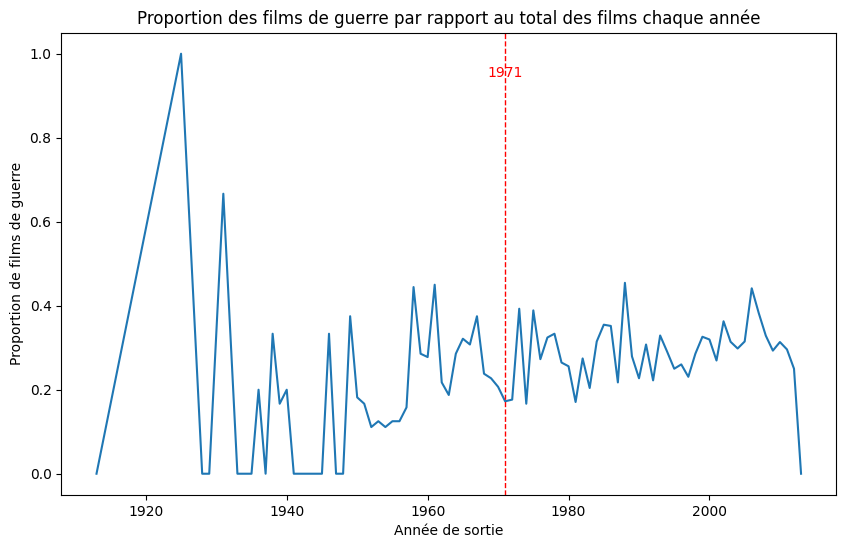

In [42]:
total_movies_per_year = IndianBangal_movies['ReleaseDate'].value_counts().sort_index()

war_movies_per_year = War_movies_Bangladesh_India['ReleaseDate'].value_counts().sort_index()

proportion_war_movies = (war_movies_per_year / total_movies_per_year).fillna(0)

plt.figure(figsize=(10, 6))
proportion_war_movies.plot(kind='line', linestyle='-')
plt.xlabel('Année de sortie')
plt.ylabel('Proportion de films de guerre')
plt.title('Proportion des films de guerre par rapport au total des films chaque année')

plt.axvline(1971, color='red', linestyle='--', linewidth=1)
plt.text(1971, plt.ylim()[1] * 0.9, '1971', color='red', ha='center')

plt.show()

We can't see any visible correlation

## Terrorism?


In [43]:

Terrorism_events = W_events[W_events['Type of Event'] == 'Terrorism']
Terrorism_events

,Sl. No,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
8,12,Mumbai Terror Attacks,26,November,2008,India,Terrorism,Mumbai,Highlighted the threat of international terrorism,Citizens of Mumbai,LashkarUnknowneUnknownTaiba,Negative
28,32,Kandahar Hijacking (IC 814),24,December,1999,India,Terrorism,"Kandahar, Afghanistan",Highlighted issues in aviation security and te...,"Passengers, crew","Hijackers, Indian Government",Negative
29,33,2001 Indian Parliament Attack,13,December,2001,India,Terrorism,New Delhi,Led to increased tensions between India and Pa...,Indian political system,"Terrorist groups, Government of India",Negative
86,96,2014 Peshawar School Massacre,16,December,2014,Pakistan,Terrorism,Peshawar,"A terrorist attack on the Army Public School, ...","Students, teachers, families",TehrikUnknowniUnknownTaliban Pakistan,Negative
229,255,Moscow Theater Hostage Crisis,23,October,2002,Russia,Terrorism,Moscow,A deadly siege carried out by Chechen terroris...,"Hostages, terrorists","Chechen terrorists, Russian security forces",Negative
230,256,Beslan School Siege,1,September,2004,Russia,Terrorism,"Beslan, North Ossetia",A terrorist attack resulting in over 330 death...,Beslan residents,"Chechen terrorists, Russian security forces",Negative
273,300,Aum Shinrikyo Tokyo Subway Sarin Attack,20,March,1995,Japan,Terrorism,Tokyo,"A deadly terrorist attack by a doomsday cult, ...","Commuters, general public",Aum Shinrikyo cult,Negative
471,507,Riyadh Compound Bombings,12,May,2003,Saudi Arabia,Terrorism,Riyadh,AlUnknownQaeda attacks targeting expatriates u...,"Expatriates, Saudi citizens",AlUnknownQaeda,Negative
500,536,Laju Ferry Hijacking,31,January,1974,Singapore,Terrorism,Singapore,A pivotal event that highlighted Singapore's v...,Singaporean citizens,"Japanese Red Army, Popular Front for the Liber...",Negative
624,662,September 11 Attacks,11,September,2001,USA,Terrorism,"NY, VA, PA",Led to global War on Terror and significant ch...,"American citizens, global citizens",AlUnknownQaeda,Negative


In [44]:

Terrorism_movies = movie_merged_sub[(movie_merged_sub['PlotSummary'].str.contains(r'Terrorism|Terrorist|terrorism|terrorist', case=False, na=False)) & ~(movie_merged_sub['ReleaseDate'].isna())]

Terrorism_movies

,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres,PlotSummary
49,261237,/m/01mrrd,The Gods Must Be Crazy,1980.0,34331783.0,109.0,"{""/m/0x82"": ""Afrikaans Language"", ""/m/02h40lc""...","{""/m/0hzlz"": ""South Africa""}","{""/m/03k9fj"": ""Adventure"", ""/m/03btsm8"": ""Acti...",The film is a collision of three separate stor...
83,273431,/m/01p0lg,Terrorama,2001.0,NaN,103.0,"{""/m/02bv9"": ""Dutch Language""}","{""/m/059j2"": ""Netherlands""}","{""/m/07s9rl0"": ""Drama"", ""/m/01z4y"": ""Comedy""}","The film tells the story of six mental cases, ..."
91,19929835,/m/04q6md9,Aftershock: Beyond the Civil War,2007.0,NaN,NaN,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/0jtdp"": ""Documentary""}",The film is about the harsh period of Reconstr...
102,4300418,/m/0bvx7h,The Hero: Love Story of a Spy,2003.0,NaN,182.0,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/01jfsb"": ""Thriller"", ""/m/0cq22f9"": ""Actio...",Arun Sharma is a spy working for RAW . He set...
233,103021,/m/0p_sc,Midnight Express,1978.0,35000000.0,121.0,"{""/m/064_8sq"": ""French Language"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/0hn10"": ""LGBT"", ...","On October 6, 1970, while on holiday in Istanb..."
...,...,...,...,...,...,...,...,...,...,...
81311,5667692,/m/0dz3lz,The Dancer Upstairs,2002.0,NaN,132.0,"{""/m/06b4d"": ""Quechua"", ""/m/02h40lc"": ""English...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",Detective Agustín Rejas is tracking the self-...
81317,29041460,/m/0crrzp8,This smells bad,2007.0,NaN,100.0,"{""/m/06nm1"": ""Spanish Language""}","{""/m/01ls2"": ""Colombia""}","{""/m/01jfsb"": ""Thriller"", ""/m/03q4nz"": ""World ...",Ricardo Caicedo is a well-to-do businessman in...
81559,19035463,/m/04jm8fm,Vishwavidhaata,1997.0,NaN,146.0,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",...","Jay Verma lives in Bombay. He is an honest, u..."
81602,2523915,/m/07ktmd,Going Overboard,1989.0,NaN,97.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01z4y"": ""Comedy"", ""/m/0q00t"": ""Stand-up c...",Shecky Moskowitz is a struggling young comedi...


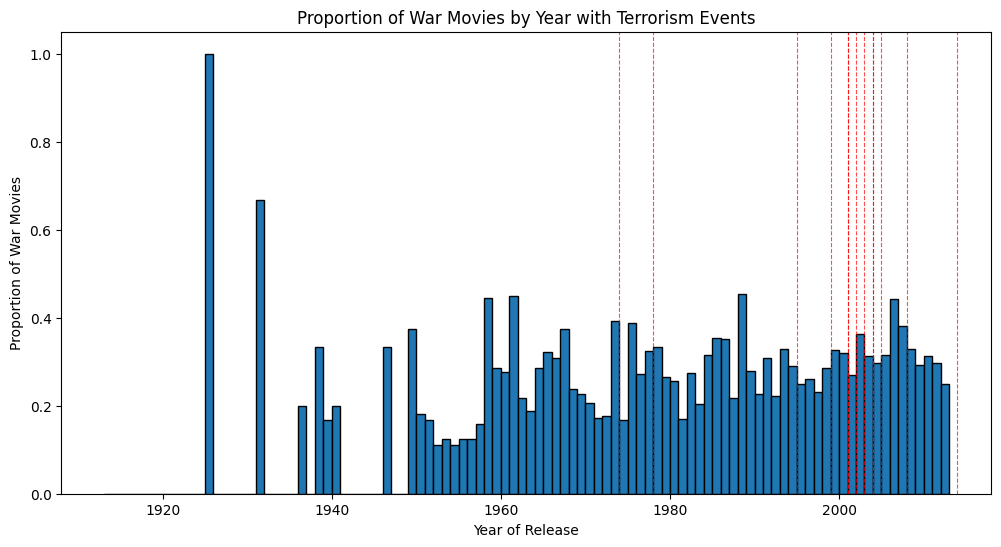

In [45]:
total_movies_per_year = movie_merged_sub['ReleaseDate'].value_counts().sort_index()

terr_movies_per_year = Terrorism_movies['ReleaseDate'].value_counts().sort_index()

proportion_terr_movies = (terr_movies_per_year / total_movies_per_year).fillna(0)

plt.figure(figsize=(12, 6))
plt.hist(proportion_war_movies.index, weights=proportion_war_movies.values, bins=100, edgecolor='black')
plt.xlabel('Year of Release')
plt.ylabel('Proportion of War Movies')
plt.title('Proportion of War Movies by Year with Terrorism Events')


for year in Terrorism_events['Year']:
    plt.axvline(year, color='red', linestyle='--', linewidth=0.8, alpha=0.7)


plt.show()

Same here, nothing noticeable.

In [46]:
import statsmodels.api as sm
from scipy.stats import ttest_ind, mannwhitneyu
import numpy as np


In [47]:

momo = Terrorism_events['Year'][624]
Terrorism_movies.loc[:, 'ReleaseDate'] = Terrorism_movies['ReleaseDate'].astype(int)

movies= pd.DataFrame(Terrorism_movies['ReleaseDate'].value_counts())

In [48]:
# Filtrer les films 5 ans avant et 5 ans après 2001
movies_before = Terrorism_movies[Terrorism_movies['ReleaseDate'] <= momo]['ReleaseDate']
movies_after = Terrorism_movies[Terrorism_movies['ReleaseDate'] >= momo]['ReleaseDate']
# Calculer le nombre de films avant et après
count_before = pd.DataFrame(movies_before.value_counts())
count_after = pd.DataFrame(movies_after.value_counts())

In [49]:

# Test t de Student et Test de Mann-Whitney U
t_stat, t_p_value = ttest_ind(count_before['count'], count_after['count'])
u_stat, u_p_value = mannwhitneyu(count_before['count'], count_after['count'])

print(t_stat, t_p_value, u_stat, u_p_value )

-10.461773765374266 1.3502076670227472e-14 12.5 4.5345552762590866e-07


Even if the null hypothesis is rejected, 
## argumente bien ici

---
---

## 2 - Exploring the feasibility of the problematic : What additional factors contribute to an actor's success beyond acting talent?


The goal is to end up with two datasets with as many colums as needed:
+ One containing the informations about movies
+ One containing the informations about actors

We will add progressively the colums we plan on keeping


### (Ali) Cleaning and fuzziy matching functions to perform on movie titles to mitigate errors due to different representations

In [50]:
import re
from rapidfuzz import process, fuzz

# Function for a first clean to the movie titles
def clean_title(title):
    """
    Cleans the movie title by converting to lowercase, removing spaces,
    removing any content within parentheses, and removing special characters.
    """
    if pd.isnull(title):
        return ""
    # Convert to lowercase
    title = title.lower()
    # Remove any content within parentheses and the parentheses themselves
    title = re.sub(r'\s*\(.*?\)\s*', '', title)
    # Remove all spaces
    title = title.replace(' ', '')
    # Remove special characters (retain only alphanumerics)
    title = re.sub(r'[^a-z0-9]', '', title)
    return title



# Function to perform fuzzy matching with error handling
def get_best_match(title, choices, scorer, score_cutoff):
    """
    Finds the best fuzzy match for a given title from a list of choices.
    
    Parameters:
    - title: The title to match.
    - choices: The list of possible matches.
    - scorer: The scoring function from RapidFuzz.
    - score_cutoff: The minimum score required to consider it a match.
    
    Returns:
    - The best match if score >= score_cutoff, else None.
    """
    result = process.extractOne(title, choices, scorer=scorer, score_cutoff=score_cutoff)
    if result:
        match, score, _ = result
        return match if score >= score_cutoff else None
    return None

# Parameters for fuzzy matching
SCORER = fuzz.token_sort_ratio
SCORE_CUTOFF = 90  # Minimum score for a match

---
## Zaynab's part
Analysis metacritic dataset, which contains scores of movies. This would help us to define the "sucess" to see how much movies are appreciated.

In [51]:

metacritic = pd.read_csv('./data/metacritic/movies.csv', sep=',')
metacritic

,id,metascore,rating,release_date,sort_no,summary,title,user_score
0,549123,94,TV-14,"July 26, 1989",101,A young boy and his little sister struggle to ...,Grave of the Fireflies (1988),8.9
1,522228,94,PG-13,"December 8, 2000",102,"In 19th century China, a magical sword given b...","Crouching Tiger, Hidden Dragon",8.2
2,550614,94,G,"September 11, 1970",103,"In a French forest in 1798, a child is found w...",The Wild Child,6.5
3,549303,94,TV-PG,"January 15, 1943",104,A young woman discovers her visiting uncle may...,Shadow of a Doubt,8.2
4,539956,94,PG,"June 19, 2015",105,"Growing up can be a bumpy road, and it’s no ex...",Inside Out,8.7
...,...,...,...,...,...,...,...,...
15320,550890,1,PG,"August 22, 1987",15321,Dodger must confront the struggles of life as ...,The Garbage Pail Kids Movie,0.7
15321,544030,1,Not Rated,"June 5, 2015",15322,"Three men—Jules Rimet (Gérard Depardieu), Joao...",United Passions,0.7
15322,522425,1,PG-13,"January 12, 1996",15323,Five brave scientists are forced to face life ...,Bio-Dome,7.5
15323,517421,1,Not Rated,"August 12, 2005",15324,Quite definitely one of the most brutal displa...,Chaos,2.5


The dataset contains some Nan information, let's see what's there proportion. And look at what values do each column take.

In [52]:
for col in metacritic.columns :
    print ('the column', col,  'contains ', metacritic[col].isna().sum()/len(metacritic[col]), 'Nan')
    if (col == 'rating') or (col == 'metascore') or (col == 'user_score') :
        print ('it takes the values', metacritic[col].value_counts(), '\n')
    print ('\n\n')

the column id contains  0.0 Nan



the column metascore contains  0.0 Nan
it takes the values metascore
64    370
65    367
66    366
68    360
72    351
     ... 
10      5
8       5
5       3
6       2
2       1
Name: count, Length: 98, dtype: int64 




the column rating contains  0.0733442088091354 Nan
it takes the values rating
R            4938
Not Rated    3429
PG-13        2580
PG           1472
Unrated       442
TV-MA         260
G             230
NR            154
TV-14         149
TV-PG         140
Approved      134
Passed         94
NC-17          60
TV-G           40
X              23
GP             23
M               9
M/PG            8
Open            6
PG--13          5
TV-Y7           2
MA-17           1
PG-13`          1
TV-Y7-FV        1
Name: count, dtype: int64 




the column release_date contains  0.0 Nan



the column sort_no contains  0.0 Nan



the column summary contains  0.00019575856443719412 Nan



the column title contains  0.0 Nan



the column user_scor

We have an interesting and pretty full dataset, let's see if it contains the movies of the CMU dataset.

We will match titles and for that we create a function that will look if the MovieNames match. We noticed that in the two datasets the Movie names are not exactly written the same way. The metacritic dataset adds sometimes the year in the moviename.

In [53]:
import re
def matching_titles_l(movie, critic):
    critic['WikipediaMovieID'] = np.nan

    for _, movie_row in movie.iterrows():
        movie_str = re.escape("".join(movie_row['MovieName'].lower().split()))
        
        # Check if 'title' in critic contains the modified 'MovieName' and assign 'WikipediaMovieID' if there's a match
        critic.loc[critic['lowtitle'].str.contains(movie_str, case=False, na=False), 'WikipediaMovieID'] = movie_row['WikipediaMovieID']

    return critic


## MATCH AVEC LA FONCTION DE ALI

In [54]:
##metacritic['lowtitle'] = metacritic['title'].str.lower()
metacritic = metacritic.drop(columns=['id', 'rating', 'release_date', 'sort_no', 'summary']).reset_index(drop=True)
metacritic

,metascore,title,user_score
0,94,Grave of the Fireflies (1988),8.9
1,94,"Crouching Tiger, Hidden Dragon",8.2
2,94,The Wild Child,6.5
3,94,Shadow of a Doubt,8.2
4,94,Inside Out,8.7
...,...,...,...
15320,1,The Garbage Pail Kids Movie,0.7
15321,1,United Passions,0.7
15322,1,Bio-Dome,7.5
15323,1,Chaos,2.5


In [55]:
## matched_l = matching_titles_l(movie_metadata, metacritic)
metacritic_final = metacritic.drop_duplicates(subset='title', keep='first').reset_index(drop=True).rename(columns={'metascore': 'metascore_metacritic', 'user_score': 'user_score_metacritic'})
metacritic_final

,metascore_metacritic,title,user_score_metacritic
0,94,Grave of the Fireflies (1988),8.9
1,94,"Crouching Tiger, Hidden Dragon",8.2
2,94,The Wild Child,6.5
3,94,Shadow of a Doubt,8.2
4,94,Inside Out,8.7
...,...,...,...
14821,1,The Singing Forest,2
14822,1,The Garbage Pail Kids Movie,0.7
14823,1,United Passions,0.7
14824,1,Bio-Dome,7.5


In [56]:
# 1. Calculate the percentage of common movies with movie_metadata before any cleaning
common_with_metadata = metacritic_final[metacritic_final['title'].isin(movie_metadata['MovieName'])]
percentage_common_metadata0 = (len(common_with_metadata) / len(movie_metadata)) * 100
print(f"Number of common movies: {len(common_with_metadata)} out of {len(movie_metadata)}")
print(f"Percentage of common movies with movie_metadata (wrt to movie_metadata): {percentage_common_metadata0:.2f}%")

Number of common movies: 8394 out of 75478
Percentage of common movies with movie_metadata (wrt to movie_metadata): 11.12%


#### With cleaning only

In [57]:
# Make copies for comparison
movie_metadata_copy1 = movie_metadata.copy()
metacritic_final_copy1 = metacritic_final.copy()

# Apply Cleaning Function to Both Copies
movie_metadata_copy1['clean_title'] = movie_metadata_copy1['MovieName'].apply(clean_title)
metacritic_final_copy1['clean_title'] = metacritic_final_copy1['title'].apply(clean_title)

# Find Common Titles
common_titles = metacritic_final_copy1['clean_title'].isin(movie_metadata_copy1['clean_title'])

# Calculate the number of common titles
num_common = common_titles.sum()
# Calculate the total number of titles in movie_metadata_copy1
total_titles = len(movie_metadata_copy1)

# Calculate the percentage of common titles with respect to movie_metadata_copy1
percentage_common = (num_common / total_titles) * 100

print(f"Number of common movies after cleaning only: {num_common} out of {total_titles}")
print(f"Percentage of common movies after cleaning only: {percentage_common:.2f}%")


Number of common movies after cleaning only: 8792 out of 75478
Percentage of common movies after cleaning only: 11.65%


#### With cleaning and fuzzy matching

In [58]:
# 2. Make copies for comparison
movie_metadata_copy2 = movie_metadata.copy()
metacritic_final_copy2 = metacritic_final.copy()

# 3. Apply the cleaning function to both copies
movie_metadata_copy2['clean_title'] = movie_metadata_copy2['MovieName'].apply(clean_title)
metacritic_final_copy2['clean_title'] = metacritic_final_copy2['title'].apply(clean_title)

# 4. Prepare the list of cleaned titles from 'movie_metadata'
metadata_titles = movie_metadata_copy2['clean_title'].tolist()

# 5. Apply fuzzy matching to find the best matches
metacritic_final_copy2['best_match'] = metacritic_final_copy2['clean_title'].apply(
    lambda x: get_best_match(x, metadata_titles, SCORER, SCORE_CUTOFF)
)

# 6. Determine which titles have a valid match
metacritic_final_copy2['is_common'] = metacritic_final_copy2['best_match'].notnull()

# 7. Calculate the number of common titles after cleaning
num_common = metacritic_final_copy2['is_common'].sum()
total_titles = len(movie_metadata_copy2)
percentage_common = (num_common / total_titles) * 100

print(f"Number of common movies after cleaning and fuzzy matching: {num_common} out of {total_titles}")
print(f"Percentage of common movies after cleaning and fuzzy matching: {percentage_common:.2f}%")

Number of common movies after cleaning and fuzzy matching: 9273 out of 75478
Percentage of common movies after cleaning and fuzzy matching: 12.29%


#### MERGING into movie_metadata

In [59]:
# 8. Create a mapping from 'clean_title' in 'movie_metadata_copy2' to 'MovieName'
clean_title_to_moviename = movie_metadata_copy2.set_index('clean_title')['MovieName'].to_dict()

# 9. Map the 'best_match' in 'metacritic_final_copy2' to the corresponding 'MovieName' in 'movie_metadata_copy2'
metacritic_final_copy2['matched_MovieName'] = metacritic_final_copy2['best_match'].map(clean_title_to_moviename)

# 10. Filter to include only movies where a match was found
metacritic_matched = metacritic_final_copy2[metacritic_final_copy2['matched_MovieName'].notnull()]

# Convert both 'user_score_metacritic' and 'user_score' to numeric
metacritic_matched[['metascore_metacritic', 'user_score_metacritic']] = metacritic_matched[['metascore_metacritic', 'user_score_metacritic']].apply(pd.to_numeric, errors='coerce')

# Aggregate matches for each 'matched_MovieName' to not have duplicates when matching!
# Define aggregation functions for each column
aggregation_functions = {
    'metascore_metacritic': 'mean',                         # Average metacritic
    'title': lambda x: ', '.join(x.unique()),             # Concatenate unique titles
    'user_score_metacritic': 'mean'                               # Average user score
}

# Group by 'matched_MovieName' and aggregate
metacritic_aggregated = metacritic_matched.groupby('matched_MovieName').agg(aggregation_functions).reset_index()

# 12. Merge onto 'movie_metadata' using 'MovieName' and 'matched_MovieName'
merged_movie_metadata_mc = pd.merge(movie_metadata, metacritic_aggregated, left_on='MovieName', right_on='matched_MovieName', how='left')

# 13. Drop the 'matched_MovieName' column as it's redundant now
merged_movie_metadata_mc = merged_movie_metadata_mc.drop(columns=['matched_MovieName', 'title'])

# Verify the number of rows
print(f"Number of rows in movie_metadata: {len(movie_metadata)}")
print(f"Number of rows in merged_movie_metadata: {len(merged_movie_metadata_mc)}")

# Display the merged dataframe
merged_movie_metadata_mc

/var/folders/pq/vs1ny6651qz1x3k8m4bz09m40000gn/T/ipykernel_71877/1182868645.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metacritic_matched[['metascore_metacritic', 'user_score_metacritic']] = metacritic_matched[['metascore_metacritic', 'user_score_metacritic']].apply(pd.to_numeric, errors='coerce')


Number of rows in movie_metadata: 75478
Number of rows in merged_movie_metadata: 75478


,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres,PlotSummary,metascore_metacritic,user_score_metacritic
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th...",35.0,7.7
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",NaN,NaN,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...,NaN,NaN
4,261236,/m/01mrr1,A Woman in Flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
75473,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011.0,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",Two former National Oceanic Atmospheric Admini...,NaN,NaN
75474,34980460,/m/0g4pl34,Knuckle,2011.0,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",{{No plot}} This film follows 12 years in the ...,65.0,7.4
75475,9971909,/m/02pygw1,Another Nice Mess,1972.0,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",NaN,NaN,NaN
75476,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992.0,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...","The story takes place in the year 2092,The Sup...",NaN,NaN


In [60]:
movie_metadata = merged_movie_metadata_mc

---
## Lylia's part

Analysis of the boxoffice dataset :

In [61]:
# Load the dataset
box_office=pd.read_csv('./boxoffice.csv')
box_office

,rank,title,studio,lifetime_gross,year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
1,2,Avatar,Fox,760507625,2009
2,3,Black Panther,BV,700059566,2018
3,4,Avengers: Infinity War,BV,678681680,2018
4,5,Titanic,Par.,659363944,1997
...,...,...,...,...,...
15738,15739,Dog Eat Dog,IFC,80,2009
15739,15740,Paranoid Girls,NaN,78,2015
15740,15741,Confession of a Child of the Century,Cohen,74,2015
15741,15742,Storage 24,Magn.,72,2013


Lifetime gross = total box office revenue over the entire time the movie runs in theater The dataset is ordered by the most successful (highest boxoffice rev) movies.



In [62]:
# Do we have some movies in boxoffice that are duplicated?
duplicates_in_box_office = box_office[box_office.duplicated(subset='title', keep=False)]
duplicates_in_box_office.shape

(87, 5)

In [63]:
# We remove duplicates 
box_office_cleaned = box_office.drop_duplicates(subset='title', keep='first')

In [64]:
#Check for NaNs
missing_values = box_office_cleaned.isnull().sum()
missing_values


rank               0
title              0
studio            34
lifetime_gross     0
year               0
dtype: int64

In [65]:
# Remove the movies that are before 1888 and after 2016 as they arent going to be in movie_metadata
box_office_filtered = box_office_cleaned[(box_office_cleaned['year'] >= miny) & (box_office_cleaned['year'] <= maxy)]

# Size before filetring 
print(box_office.shape)
# Size after filetring 
print(box_office_filtered.shape)

(15743, 5)
(14542, 5)


In [66]:
# How much info did we loose in boxoffice (not relevant)
loss = 100-(box_office_filtered.shape[0]*100)/box_office.shape[0]
print('We lost',loss,'% of data after removing duplicates and filtering')


We lost 7.628787397573518 % of data after removing duplicates and filtering


In [67]:
box_office_final = box_office_filtered.drop(columns=['rank', 'studio', 'year']).reset_index(drop=True)
box_office_final

,title,lifetime_gross
0,Star Wars: The Force Awakens,936662225
1,Avatar,760507625
2,Titanic,659363944
3,Jurassic World,652270625
4,Marvel's The Avengers,623357910
...,...,...
14537,Dog Eat Dog,80
14538,Paranoid Girls,78
14539,Confession of a Child of the Century,74
14540,Storage 24,72


## MATCH AVEC LA FONCTION DE ALI

In [68]:
# 1. Calculate the percentage of common movies with movie_metadata before any cleaning
common_with_metadata = box_office_final[box_office_final['title'].isin(movie_metadata['MovieName'])]
percentage_common_metadata0 = (len(common_with_metadata) / len(movie_metadata)) * 100
print(f"Number of common movies: {len(common_with_metadata)} out of {len(movie_metadata)}")
print(f"Percentage of common movies with movie_metadata (wrt to movie_metadata): {percentage_common_metadata0:.2f}%")

Number of common movies: 9235 out of 75478
Percentage of common movies with movie_metadata (wrt to movie_metadata): 12.24%


#### With cleaning only

In [69]:
# 2. Make copies for comparison
movie_metadata_copy1 = movie_metadata.copy()
box_office_final_copy1 = box_office_final.copy()

# 3. Apply Cleaning Function to Both Copies
movie_metadata_copy1['clean_title'] = movie_metadata_copy1['MovieName'].apply(clean_title)
box_office_final_copy1['clean_title'] = box_office_final_copy1['title'].apply(clean_title)

# 4. Find Common Titles
common_titles = box_office_final_copy1['clean_title'].isin(movie_metadata_copy1['clean_title'])

# 5. Calculate the number of common titles
num_common = common_titles.sum()
# Calculate the total number of titles in movie_metadata_copy1
total_titles = len(movie_metadata_copy1)

# 6. Calculate the percentage of common titles with respect to movie_metadata_copy1
percentage_common = (num_common / total_titles) * 100

print(f"Number of common movies: {num_common} out of {total_titles}")
print(f"Percentage of common movies: {percentage_common:.2f}%")

Number of common movies: 10349 out of 75478
Percentage of common movies: 13.71%


#### With cleaning and fuzzy matching

In [70]:
# 7. Make copies for fuzzy matching
movie_metadata_copy2 = movie_metadata.copy()
box_office_final_copy2 = box_office_final.copy()

# 8. Apply the cleaning function to both copies
movie_metadata_copy2['clean_title'] = movie_metadata_copy2['MovieName'].apply(clean_title)
box_office_final_copy2['clean_title'] = box_office_final_copy2['title'].apply(clean_title)

# 9. Prepare the list of cleaned titles from 'movie_metadata'
metadata_titles = movie_metadata_copy2['clean_title'].tolist()

# 10. Apply fuzzy matching to find the best matches
box_office_final_copy2['best_match'] = box_office_final_copy2['clean_title'].apply(
    lambda x: get_best_match(x, metadata_titles, SCORER, SCORE_CUTOFF)
)

# 11. Determine which titles have a valid match
box_office_final_copy2['is_common'] = box_office_final_copy2['best_match'].notnull()

# 12. Calculate the number of common titles after cleaning
num_common = box_office_final_copy2['is_common'].sum()
total_titles = len(movie_metadata_copy2)
percentage_common = (num_common / total_titles) * 100

print(f"Number of common movies after cleaning: {num_common} out of {total_titles}")
print(f"Percentage of common movies after cleaning: {percentage_common:.2f}%")

Number of common movies after cleaning: 10862 out of 75478
Percentage of common movies after cleaning: 14.39%


#### MERGING into movie_metadata

In [71]:
# 8. Create a mapping from 'clean_title' in 'movie_metadata_copy2' to 'MovieName'
clean_title_to_moviename = movie_metadata_copy2.set_index('clean_title')['MovieName'].to_dict()

# 9. Map the 'best_match' in 'box_office_final_copy2' to the corresponding 'MovieName' in 'movie_metadata_copy2'
box_office_final_copy2['matched_MovieName'] = box_office_final_copy2['best_match'].map(clean_title_to_moviename)

# 10. Filter to include only movies where a match was found
box_office_final_matched = box_office_final_copy2[box_office_final_copy2['matched_MovieName'].notnull()]

# Aggregate matches for each 'matched_MovieName' to not have duplicates when matching!
# Define aggregation functions for each column
aggregation_functions = {
    'title': lambda x: ', '.join(x.unique()),             # Concatenate unique titles
    'lifetime_gross': 'mean'                              # Average lifetime gross
}

# Group by 'matched_MovieName' and aggregate
box_office_final_aggregated = box_office_final_matched.groupby('matched_MovieName').agg(aggregation_functions).reset_index()

# 12. Merge onto 'movie_metadata' using 'MovieName' and 'matched_MovieName'
merged_movie_metadata_bo = pd.merge(movie_metadata, box_office_final_aggregated, left_on='MovieName', right_on='matched_MovieName', how='left')

# 13. Drop the 'matched_MovieName' column as it's redundant now
merged_movie_metadata_bo = merged_movie_metadata_bo.drop(columns=['matched_MovieName', 'title'])

# Verify the number of rows
print(f"Number of rows in movie_metadata: {len(movie_metadata)}")
print(f"Number of rows in merged_movie_metadata: {len(merged_movie_metadata_bo)}")

# Display the merged dataframe
merged_movie_metadata_bo

Number of rows in movie_metadata: 75478
Number of rows in merged_movie_metadata: 75478


,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres,PlotSummary,metascore_metacritic,user_score_metacritic,lifetime_gross
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th...",35.0,7.7,NaN
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",NaN,NaN,NaN,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...,NaN,NaN,NaN
4,261236,/m/01mrr1,A Woman in Flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75473,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011.0,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",Two former National Oceanic Atmospheric Admini...,NaN,NaN,NaN
75474,34980460,/m/0g4pl34,Knuckle,2011.0,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",{{No plot}} This film follows 12 years in the ...,65.0,7.4,2647.0
75475,9971909,/m/02pygw1,Another Nice Mess,1972.0,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",NaN,NaN,NaN,NaN
75476,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992.0,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...","The story takes place in the year 2092,The Sup...",NaN,NaN,NaN


In [72]:
movie_metadata = merged_movie_metadata_bo

---
## Ali's part

## PART A : Cleaning of CelebA and Rotten Tomatoes datasets

### **Cleaning CelebA dataset**

In [73]:
# Load the file, skipping the first two lines as they are headers or metadata
file_path = './data/MovieSummaries/list_identity_celeba.txt'
identity_data = pd.read_csv(file_path, sep='\s+', skiprows=2, names=['ImageID', 'IdentityName'])
# Replace underscores with spaces in the IdentityName column
identity_data['IdentityName'] = identity_data['IdentityName'].str.replace('_', ' ')
identity_data.head(10)

,ImageID,IdentityName
0,000001.jpg,Elizabeth Gutierrez
1,000002.jpg,Emilia Fox
2,000003.jpg,Shane Harper
3,000004.jpg,Leonor Varela
4,000005.jpg,Tatana Kucharova
5,000006.jpg,Jaimee Grubbs
6,000007.jpg,Stephen Colletti
7,000008.jpg,Mario Cantone
8,000009.jpg,Gabriela Spanic
9,000010.jpg,Anita Briem


In [74]:
attr_file_path = './data/MovieSummaries/list_attr_celeba.txt'
# Read the first line as column names and the remaining lines as data
attributes_data = pd.read_csv(attr_file_path, sep='\s+', skiprows=1)

attributes_data.head(10)

,ImageID,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
5,000006.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,1,-1,1,-1,-1,1
6,000007.jpg,1,-1,1,1,-1,-1,1,1,1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
7,000008.jpg,1,1,-1,1,-1,-1,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
8,000009.jpg,-1,1,1,-1,-1,1,1,-1,-1,...,-1,1,-1,-1,1,-1,1,-1,-1,1
9,000010.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1


In [75]:
# Merge the two dataframes on 'image_id'
merged_df = pd.merge(identity_data, attributes_data, on='ImageID')

# Display the merged dataframe
merged_df.head()

,ImageID,IdentityName,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,Elizabeth Gutierrez,-1,1,1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,Emilia Fox,-1,-1,-1,1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,Shane Harper,-1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,Leonor Varela,-1,-1,1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,Tatana Kucharova,-1,1,1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


Now we have 202,599 images of 10,177 unique actors, so there's many actors with multiple images. In fact, in the scope of our study, we want only 1 attributes description per actor, and hence only a subset of the given attributes. We only care for their physical long-lasting attributes, that remain fix when goig from a picture to another for the same actor. We'll do te following (we could've doen it in reverse order also):

--> we san drop the ImageID as it won't serve us anymore

--> remove duplicates, keep only 1 picture per actor, reducing our dataframe from 202,599 rows to 10,177 rows

--> keep only essential and non-superficial features, that we "judge" proper to each actor (at some degree)

In [76]:
# Step 1: Drop the 'image_id' column
merged_df2 = merged_df.drop(columns=['ImageID'])

# Step 2: Remove duplicates, keeping only one entry per actor
# We use 'identity_name' as the unique identifier and keep the first occurrence
unique_actor_df = merged_df2.drop_duplicates(subset='IdentityName', keep='first')

# Step 3: Keep only essential, non-superficial features
# Define the list of long-lasting physical attributes we want to keep
essential_attributes = [
    'IdentityName', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 
    'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 
    'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Goatee', 'Gray_Hair', 
    'High_Cheekbones', 'Male', 'Mustache', 
    'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 
    'Rosy_Cheeks', 'Sideburns', 'Straight_Hair', 'Wavy_Hair'
]

# Select only the essential columns from the dataframe
final_df = unique_actor_df[essential_attributes]

# Display the final dataframe
final_df.head(10)

,IdentityName,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Straight_Hair,Wavy_Hair
0,Elizabeth Gutierrez,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,1,-1,-1,-1,1,-1
1,Emilia Fox,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,Shane Harper,-1,-1,-1,-1,-1,1,-1,-1,-1,...,1,1,-1,-1,1,-1,-1,-1,-1,1
3,Leonor Varela,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,1,-1,-1,-1,1,-1
4,Tatana Kucharova,1,1,-1,-1,-1,1,-1,-1,-1,...,1,1,-1,-1,1,-1,-1,-1,-1,-1
5,Jaimee Grubbs,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
6,Stephen Colletti,-1,1,1,-1,-1,1,1,1,-1,...,-1,1,-1,-1,1,-1,-1,-1,1,-1
7,Mario Cantone,1,-1,1,-1,-1,1,-1,1,-1,...,-1,1,-1,-1,1,-1,-1,-1,-1,-1
8,Gabriela Spanic,1,1,-1,-1,1,1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,-1
9,Anita Briem,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1


### Number of actors we have in **character_metadata**

In [77]:
# Assuming 'character_metadata' contains a column named 'ActorName' with each actor's name
num_actors = character_metadata['ActorName'].nunique()
print(f"Number of unique actors: {num_actors}")

Number of unique actors: 134078


### Number of actors we have in **list_identity_celeba**

In [78]:
# Get all unique identity names
unique_names = identity_data['IdentityName'].unique()
# Display the result
print(f"Number of unique actors: {len(unique_names)}")

Number of unique actors: 10177


### Number of actors in common in **character_metadata** & **list_identity_celeba**

In [79]:
# Common actors to the two dataframes

# Convert both columns to sets for efficient intersection
identity_names_set = set(identity_data['IdentityName'])
actor_names_set = set(character_metadata['ActorName'])

# Find the intersection
common_names = identity_names_set.intersection(actor_names_set)

# Output the number of common names and the names themselves
print(f"Number of names in common: {len(common_names)}")
print(f"Percentage of actors in list_identity_celeba that are in character_metadata: {len(common_names)/len(actor_names_set) * 100}%")

Number of names in common: 4597
Percentage of actors in list_identity_celeba that are in character_metadata: 3.428575690451152%


### Final CelebA dataframe cleaned to use : **final_celebA_df**

In [80]:
# Filter final_df to only include rows where 'identity_name' is in common_names
final_celebA_df = final_df[final_df['IdentityName'].isin(common_names)].reset_index(drop=True)

# Display the resulting dataframe
print(f"Number of rows in final_celebA_df: {len(final_celebA_df)}")
final_celebA_df.head(5)

Number of rows in final_celebA_df: 4597


,IdentityName,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Straight_Hair,Wavy_Hair
0,Elizabeth Gutierrez,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,1,-1,-1,-1,1,-1
1,Emilia Fox,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,Shane Harper,-1,-1,-1,-1,-1,1,-1,-1,-1,...,1,1,-1,-1,1,-1,-1,-1,-1,1
3,Leonor Varela,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,1,-1,-1,-1,1,-1
4,Stephen Colletti,-1,1,1,-1,-1,1,1,1,-1,...,-1,1,-1,-1,1,-1,-1,-1,1,-1


Remark that as names in character_metadata are actually unique, we had no need to filter list_identity_celebA too to remove duplicates

In [81]:
character_metadata = pd.merge(character_metadata, final_celebA_df, left_on='ActorName', right_on='IdentityName', how='left' )

### **Cleaning Rotten Tomatoes dataset**

--> Actually we only need "rotten_tomatoes_movies.csv", the critics are non-necessary

In [82]:
# 1. Load the Rotten Tomatoes movies dataset
rt_movies_path = './data/MovieSummaries/rotten_tomatoes_movies.csv'
rt_movies_df = pd.read_csv(rt_movies_path)

# 2. First filter on the columns
rt_movies_df = rt_movies_df[['movie_title', 'actors', 'original_release_date', 'tomatometer_rating', 'audience_rating']]

# 3. Dropping duplicates
rt_movies_df = rt_movies_df.drop_duplicates(subset='movie_title', keep='first')

print(rt_movies_df.shape)
rt_movies_df.head(5)

(17106, 5)


,movie_title,actors,original_release_date,tomatometer_rating,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,49.0,53.0
1,Please Give,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,87.0,64.0
2,10,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,67.0,53.0
3,12 Angry Men (Twelve Angry Men),"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,100.0,97.0
4,"20,000 Leagues Under The Sea","James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,89.0,74.0


In [83]:
type(rt_movies_df['original_release_date'][0])

str

In [84]:
# 3. Filter for movies released between 1888 and 2016 (inclusive)
# Convert original_release_date to datetime format for filtering
rt_movies_df['original_release_date'] = rt_movies_df['original_release_date'].astype(str).str.extract(r'(\d{4})')
rt_movies_df['original_release_date'] = rt_movies_df['original_release_date'].astype(float)

rt_movies_df = rt_movies_df[(rt_movies_df['original_release_date'] >= miny) & 
                            (rt_movies_df['original_release_date'] <= maxy)]

rt_movies_df.shape

(14087, 5)

In [85]:
rt_movies_df = rt_movies_df.drop(columns=['original_release_date'])

#### Calculating the percentage of common movies with respect to movie_metadata and merging on the common titles

In [86]:
# 1. Calculate the percentage of common movies with movie_metadata before any cleaning
common_with_metadata = rt_movies_df[rt_movies_df['movie_title'].isin(movie_metadata['MovieName'])]
percentage_common_metadata0 = (len(common_with_metadata) / len(movie_metadata)) * 100
print(f"Number of common movies: {len(common_with_metadata)} out of {len(movie_metadata)}")
print(f"Percentage of common movies with movie_metadata (wrt to movie_metadata): {percentage_common_metadata0:.2f}%")

Number of common movies: 9381 out of 75478
Percentage of common movies with movie_metadata (wrt to movie_metadata): 12.43%


#### With cleaning only

In [87]:
# Make copies for comparison
movie_metadata_copy1 = movie_metadata.copy()
rt_movies_df_copy1 = rt_movies_df.copy()

# Apply Cleaning Function to Both Copies
movie_metadata_copy1['clean_title'] = movie_metadata_copy1['MovieName'].apply(clean_title)
rt_movies_df_copy1['clean_title'] = rt_movies_df_copy1['movie_title'].apply(clean_title)

# Find Common Titles
common_titles = rt_movies_df_copy1['clean_title'].isin(movie_metadata_copy1['clean_title'])

# Calculate the number of common titles
num_common = common_titles.sum()
# Calculate the total number of titles in RottenTomatoes_df
total_titles = len(movie_metadata_copy1)

# Calculate the percentage of common titles with respect to RottenTomatoes_df
percentage_common = (num_common / total_titles) * 100

print(f"Number of common movies: {num_common} out of {total_titles}")
print(f"Percentage of common movies: {percentage_common:.2f}%")

Number of common movies: 10502 out of 75478
Percentage of common movies: 13.91%


#### With cleaning and fuzzy matching

In [88]:
# 2. Make copies for comparison
movie_metadata_copy2 = movie_metadata.copy()
rt_movies_df_copy2 = rt_movies_df.copy()

# 3. Apply the cleaning function to both copies
movie_metadata_copy2['clean_title'] = movie_metadata_copy2['MovieName'].apply(clean_title)
rt_movies_df_copy2['clean_title'] = rt_movies_df_copy2['movie_title'].apply(clean_title)

# 4. Prepare the list of cleaned titles from 'movie_metadata'
metadata_titles = movie_metadata_copy2['clean_title'].tolist()

# 5. Apply fuzzy matching to find the best matches
rt_movies_df_copy2['best_match'] = rt_movies_df_copy2['clean_title'].apply(
    lambda x: get_best_match(x, metadata_titles, SCORER, SCORE_CUTOFF)
)

# 6. Determine which titles have a valid match
rt_movies_df_copy2['is_common'] = rt_movies_df_copy2['best_match'].notnull()

In [89]:
# 7. Calculate the number of common titles after cleaning
num_common = rt_movies_df_copy2['is_common'].sum()
total_titles = len(movie_metadata_copy2)
percentage_common = (num_common / total_titles) * 100

print(f"Number of common movies after cleaning: {num_common} out of {total_titles}")
print(f"Percentage of common movies after cleaning: {percentage_common:.2f}%")

Number of common movies after cleaning: 10883 out of 75478
Percentage of common movies after cleaning: 14.42%


#### MERGING into movie_metadata

In [90]:
# 8. Create a mapping from 'clean_title' in 'movie_metadata_copy2' to 'MovieName'
clean_title_to_moviename = movie_metadata_copy2.set_index('clean_title')['MovieName'].to_dict()

# 9. Map the 'best_match' in 'rt_movies_df_copy2' to the corresponding 'MovieName' in 'movie_metadata_copy2'
rt_movies_df_copy2['matched_MovieName'] = rt_movies_df_copy2['best_match'].map(clean_title_to_moviename)

# 10. Filter to include only movies where a match was found
rt_movies_df_matched = rt_movies_df_copy2[rt_movies_df_copy2['matched_MovieName'].notnull()]

# Aggregate matches for each 'matched_MovieName' to not have duplicates when matching!
# Define aggregation functions for each column
aggregation_functions = {
    'movie_title': lambda x: ', '.join(x.unique()),   # Concatenate unique movie titles
    'actors': lambda x: ', '.join(x.dropna().unique()),  # Concatenate unique actors
    'tomatometer_rating': 'mean',                      # Average tomatometer ratings
    'audience_rating': 'mean'                          # Average audience ratings
}

# Group by 'matched_MovieName' and aggregate
rt_movies_df_aggregated = rt_movies_df_matched.groupby('matched_MovieName').agg(aggregation_functions).reset_index()


# 12. Merge onto 'movie_metadata' using 'MovieName' and 'matched_MovieName'
merged_movie_metadata_rt = pd.merge(
    movie_metadata,
    rt_movies_df_aggregated,
    left_on='MovieName',
    right_on='matched_MovieName',
    how='left'
)

# 13. Drop the 'matched_MovieName' column as it's redundant now
merged_movie_metadata_rt = merged_movie_metadata_rt.drop(columns=['matched_MovieName', 'movie_title'])

# Verify the number of rows
print(f"Number of rows in movie_metadata: {len(movie_metadata)}")
print(f"Number of rows in merged_movie_metadata: {len(merged_movie_metadata_rt)}")

merged_movie_metadata_rt

Number of rows in movie_metadata: 75478
Number of rows in merged_movie_metadata: 75478


,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres,PlotSummary,metascore_metacritic,user_score_metacritic,lifetime_gross,actors,tomatometer_rating,audience_rating
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th...",35.0,7.7,NaN,NaN,NaN,NaN
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...,NaN,NaN,NaN,NaN,NaN,NaN
4,261236,/m/01mrr1,A Woman in Flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75473,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011.0,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",Two former National Oceanic Atmospheric Admini...,NaN,NaN,NaN,NaN,NaN,NaN
75474,34980460,/m/0g4pl34,Knuckle,2011.0,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",{{No plot}} This film follows 12 years in the ...,65.0,7.4,2647.0,Liam Ó Maonlai,93.0,67.0
75475,9971909,/m/02pygw1,Another Nice Mess,1972.0,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",NaN,NaN,NaN,NaN,NaN,NaN,NaN
75476,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992.0,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...","The story takes place in the year 2092,The Sup...",NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
movie_metadata = merged_movie_metadata_rt

## PART B :

## **1. Defining "Success" metrics**

--> We want to first establish clear and quatifiable measures of an actor's success :

- Box office revenue : **total & average revenue of movies** an actor has participated in
- Populatity : **number of films**
- Critical Acclaim : 

Dataframes : plot_summaries, movie_metadata, character_metadata, tvtropes_clusters

### Total revenue of movies an actor has participated in

In [92]:
# Verify if in movie_metadata['BoxOfficeRevenue'] there's some nan values, to maybe clean
nan_percentage = movie_metadata['BoxOfficeRevenue'].isna().mean() * 100
print(f"Percentage of NaNs in 'BoxOfficeRevenue': {nan_percentage:.2f}%")

# Replace NaN values in BoxOfficeRevenue with 0
# movie_metadata['BoxOfficeRevenue'] = movie_metadata['BoxOfficeRevenue'].fillna(0)

Percentage of NaNs in 'BoxOfficeRevenue': 90.04%


With 89.72% of values missing in the BoxOfficeRevenue column, filling with zero remains a viable option. However, the high proportion of missing data suggests that relying on box office revenue alone might not provide a complete or representative measure of success. **We'll try later to complete the given data on BoxOfficeRevenue bringing external data from Wikipedia.**

--> CONTINUITY AFTER IMPORTING A MAX TO FILL THE MISSING DATA

In [93]:
# Merge movie and character data on WikipediaMovieID
merged_df = pd.merge(character_metadata, movie_metadata, on='WikipediaMovieID', how='inner')
merged_df

,WikipediaMovieID,FreebaseMovieID_x,ReleaseDate_x,CharacterName,ActorDOB,ActorGender,ActorHeight,ActorEthnicity,ActorName,ActorAgeAtRelease,...,Languages,Countries,Genres,PlotSummary,metascore_metacritic,user_score_metacritic,lifetime_gross,actors,tomatometer_rating,audience_rating
0,975900,/m/03vyhn,2001.0,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,...,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th...",35.0,7.7,NaN,NaN,NaN,NaN
1,975900,/m/03vyhn,2001.0,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,...,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th...",35.0,7.7,NaN,NaN,NaN,NaN
2,975900,/m/03vyhn,2001.0,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,...,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th...",35.0,7.7,NaN,NaN,NaN,NaN
3,975900,/m/03vyhn,2001.0,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,...,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th...",35.0,7.7,NaN,NaN,NaN,NaN
4,975900,/m/03vyhn,2001.0,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,...,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th...",35.0,7.7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429076,913762,/m/03pcrp,1992.0,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,...,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...","The story takes place in the year 2092,The Sup...",NaN,NaN,NaN,NaN,NaN,NaN
429077,913762,/m/03pcrp,1992.0,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,...,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...","The story takes place in the year 2092,The Sup...",NaN,NaN,NaN,NaN,NaN,NaN
429078,28308153,/m/0cp05t9,1957.0,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,...,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/0lsxr"": ""Crime Fiction""}",NaN,NaN,NaN,NaN,NaN,NaN,NaN
429079,28308153,/m/0cp05t9,1957.0,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,...,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/0lsxr"": ""Crime Fiction""}",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# Calculate Total Box Office Revenue per Actor
actor_revenue = merged_df.groupby('ActorName')['BoxOfficeRevenue'].sum().reset_index()
total_revenue = actor_revenue.rename(columns={'BoxOfficeRevenue': 'TotalBoxOfficeRevenue'})
# Sort total_revenue DataFrame in place by 'TotalBoxOfficeRevenue' in descending order
total_revenue.sort_values(by='TotalBoxOfficeRevenue', ascending=False, inplace=True)
print (total_revenue.head(20))

                   ActorName  TotalBoxOfficeRevenue
25074       Daniel Radcliffe           6.180610e+10
33674            Emma Watson           5.410197e+10
2100            Alan Rickman           3.308384e+10
82668         Michael Gambon           3.012953e+10
97735          Ralph Fiennes           2.724555e+10
95904         Pierce Brosnan           2.574199e+10
58920            Johnny Depp           2.205964e+10
102584           Roger Moore           1.968982e+10
101068       Robbie Coltrane           1.851744e+10
16462           Cameron Diaz           1.794876e+10
117492             Tom Hanks           1.736794e+10
44546          Harrison Ford           1.705529e+10
14093          Bonnie Wright           1.541230e+10
101328     Robert Downey Jr.           1.525998e+10
45484   Helena Bonham Carter           1.476767e+10
35674          Ewan McGregor           1.444280e+10
107230          Sean Connery           1.428163e+10
105771     Samuel L. Jackson           1.344091e+10
117406      

In [95]:
# Count actors with 0.0 total revenue
zero_revenue_count = actor_revenue[actor_revenue['BoxOfficeRevenue'] == 0.0].shape[0]

# Calculate total number of actors
total_actors = actor_revenue.shape[0]

# Calculate percentage
percentage_zero_revenue = (zero_revenue_count / total_actors) * 100
print(f"Percentage of actors with a total revenue of 0.0: {percentage_zero_revenue:.2f}%")

Percentage of actors with a total revenue of 0.0: 72.56%


Ok so that's maybe not so good to base ourself on this metric, with approx. 72.12% of lost values. Or maybe not, analysis may be biased towards actors in high-grossing films, ignoring those in smaller projects.

### Average revenue of movies an actor has participated in

In [96]:
# Calculate Average Box Office Revenue per Movie (per actor)
average_revenue = merged_df.groupby('ActorName')['BoxOfficeRevenue'].mean().reset_index().rename(columns={'BoxOfficeRevenue': 'AverageBoxOfficeRevenue'})
average_revenue.sort_values(by='AverageBoxOfficeRevenue', ascending=False, inplace=True)
average_revenue.head(20)

,ActorName,AverageBoxOfficeRevenue
107198,Sean Anthony Moran,2.782275e+09
52774,Jason Whyte,2.782275e+09
107035,Scott Lawrence,2.782275e+09
28901,Dileep Rao,1.803904e+09
45137,Hebe Beardsall,1.328111e+09
123279,Will Dunn,1.328111e+09
32980,Ellie Darcey-Alden,1.328111e+09
3448,Alfie McIlwain,1.328111e+09
104525,Ryan Turner,1.328111e+09
9033,Arthur Bowen,1.328111e+09


In [97]:
# Calculate Number of Movies per Actor
movie_count = merged_df.groupby('ActorName')['MovieName'].nunique().reset_index().rename(columns={'MovieName': 'NumberOfMovies'})
# Sort movie_count DataFrame in place by 'NumberOfMovies' in descending order
movie_count.sort_values(by='NumberOfMovies', ascending=False, inplace=True)
movie_count.head(20)

,ActorName,NumberOfMovies
81595,Mel Blanc,570
85461,Mithun Chakraborty,294
90923,Oliver Hardy,274
85722,Mohanlal,219
85612,Moe Howard,219
68730,Larry Fine,213
75486,Mammootty,212
28394,Dharmendra Deol,201
96513,Prakash Raj,190
50587,Jagathi Sreekumar,181


In [98]:
# Combine Metrics
success_metrics = total_revenue.merge(average_revenue, on='ActorName').merge(movie_count, on='ActorName')

# Display top 10 actors by Total Box Office Revenue
top_actors = success_metrics.sort_values(by='TotalBoxOfficeRevenue', ascending=False)
top_actors.head(20)

,ActorName,TotalBoxOfficeRevenue,AverageBoxOfficeRevenue,NumberOfMovies
0,Daniel Radcliffe,6.180610e+10,9.224791e+08,15
1,Emma Watson,5.410197e+10,9.327926e+08,12
2,Alan Rickman,3.308384e+10,6.126637e+08,40
3,Michael Gambon,3.012953e+10,5.794140e+08,57
4,Ralph Fiennes,2.724555e+10,5.796925e+08,40
5,Pierce Brosnan,2.574199e+10,2.925226e+08,46
6,Johnny Depp,2.205964e+10,3.939221e+08,53
7,Roger Moore,1.968982e+10,1.613920e+08,46
8,Robbie Coltrane,1.851744e+10,4.873009e+08,53
9,Cameron Diaz,1.794876e+10,4.174131e+08,34


## **2. Define present actors' characteristics that we want to evaluate**

### **Demographics** : Height, Gender, Ethnicity

In [99]:
# Calculate percentage of NaN values for ActorGender and ActorHeight
gender_nan_percentage = character_metadata['ActorGender'].isna().mean() * 100
height_nan_percentage = character_metadata['ActorHeight'].isna().mean() * 100
ethnicity_nan_percentage = character_metadata['ActorEthnicity'].isna().mean() * 100

print(f"Percentage of NaNs in 'ActorGender': {gender_nan_percentage:.2f}%")
print(f"Percentage of NaNs in 'ActorHeight': {height_nan_percentage:.2f}%")
print(f"Percentage of NaNs in 'ActorEthnicity': {ethnicity_nan_percentage:.2f}%")

Percentage of NaNs in 'ActorGender': 9.78%
Percentage of NaNs in 'ActorHeight': 65.52%
Percentage of NaNs in 'ActorEthnicity': 74.67%


--> AGAIN, WE'LL TRY TO FILL THE MISSING VALUES IMPORTING FROM WIKI

---
## Christian's part

In [100]:
imdb_names_raw = pd.read_csv('/Users/lylou/Downloads/IMDB/name.basics.tsv', sep='\t')


In [101]:
imdb_movies_raw = pd.read_csv('/Users/lylou/Downloads/IMDB/title.basics.tsv', sep='\t')


/var/folders/pq/vs1ny6651qz1x3k8m4bz09m40000gn/T/ipykernel_71877/1566051328.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_movies_raw = pd.read_csv('/Users/lylou/Downloads/IMDB/title.basics.tsv', sep='\t')


In [102]:
imdb_ratings_raw = pd.read_csv('/Users/lylou/Downloads/IMDB/title.ratings.tsv', sep='\t')


In [103]:
print("Initial shape of IMdB Names:",imdb_names_raw.shape)
print("Initial shape of IMdB Movies:",imdb_movies_raw.shape)
print("Initial shape of IMdB Ratings:",imdb_ratings_raw.shape)

Initial shape of IMdB Names: (13926619, 6)
Initial shape of IMdB Movies: (11217433, 9)
Initial shape of IMdB Ratings: (1495761, 3)


Let's analze the percentage of NaN in these dataset without forgetting that a NaN in the IMdB dataset



In [104]:
nan_value='\\N'
print("Names\n",(imdb_names_raw == nan_value).mean() * 100,"\n")
print("Movie\n",(imdb_movies_raw == nan_value).mean() * 100,"\n")
print("Ratings\n",(imdb_ratings_raw == nan_value).mean() * 100,"\n")

Names
 nconst                0.000000
primaryName           0.000366
birthYear            95.476626
deathYear            98.304800
primaryProfession    19.383592
knownForTitles       11.278078
dtype: float64 

Movie
 tconst             0.000000
titleType          0.000000
primaryTitle       0.000000
originalTitle      0.000000
isAdult            0.000009
startYear         12.631919
endYear           98.825275
runtimeMinutes    68.444581
genres             4.455725
dtype: float64 

Ratings
 tconst           0.0
averageRating    0.0
numVotes         0.0
dtype: float64 



In [105]:
imdb_movies = imdb_movies_raw[imdb_movies_raw['titleType']=='movie']
imdb_movies = imdb_movies.drop(columns=['titleType','primaryTitle','isAdult','endYear'])

imdb_movies.replace('\\N', np.nan, inplace=True)
imdb_movies = imdb_movies.dropna(subset=['originalTitle','startYear'])

imdb_movies.rename(columns={'originalTitle': 'MovieName',
                            'startYear':'YearOfRelease',
                            'runtimeMinutes':'Runtime',
                            'genres':'Genres'}, inplace=True)

imdb_movies['YearOfRelease'] = imdb_movies['YearOfRelease'].astype(int)
imdb_movies['Runtime'] = imdb_movies['Runtime'].astype(float).round(1)

imdb_movies

,tconst,MovieName,YearOfRelease,Runtime,Genres
8,tt0000009,Miss Jerry,1894,45.0,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,1897,100.0,"Documentary,News,Sport"
498,tt0000502,Bohemios,1905,100.0,NaN
570,tt0000574,The Story of the Kelly Gang,1906,70.0,"Action,Adventure,Biography"
587,tt0000591,L'enfant prodigue,1907,90.0,Drama
...,...,...,...,...,...
11217324,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,57.0,Documentary
11217351,tt9916680,De la ilusión al desconcierto: cine colombiano...,2007,100.0,Documentary
11217363,tt9916706,Dankyavar Danka,2013,NaN,Comedy
11217373,tt9916730,6 Gunn,2017,116.0,Drama


In [106]:
imdb_min_year = imdb_movies_raw[imdb_movies_raw['startYear'] != '\\N']['startYear'].min()
imdb_max_year = imdb_movies_raw[imdb_movies_raw['startYear'] != '\\N']['startYear'].max()
print("Movie Year Range in IMdB dataset:",imdb_min_year, "-",imdb_max_year)

Movie Year Range in IMdB dataset: 1874 - 2031


In [107]:
imdb_movies = imdb_movies[(imdb_movies['YearOfRelease'] >= miny) & (imdb_movies['YearOfRelease'] <= maxy)]

print(f"{len(imdb_movies)} movies of the IMdB dataset are in the range {1888}-{maxy}")

443140 movies of the IMdB dataset are in the range 1888-2016.0


We filter out the movies that are not in our CMU dataset



In [108]:
imdb_movies

,tconst,MovieName,YearOfRelease,Runtime,Genres
8,tt0000009,Miss Jerry,1894,45.0,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,1897,100.0,"Documentary,News,Sport"
498,tt0000502,Bohemios,1905,100.0,NaN
570,tt0000574,The Story of the Kelly Gang,1906,70.0,"Action,Adventure,Biography"
587,tt0000591,L'enfant prodigue,1907,90.0,Drama
...,...,...,...,...,...
11217103,tt9916162,Making of 'La Virgen de los sicarios',1999,45.0,Documentary
11217324,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,57.0,Documentary
11217351,tt9916680,De la ilusión al desconcierto: cine colombiano...,2007,100.0,Documentary
11217363,tt9916706,Dankyavar Danka,2013,NaN,Comedy


In [109]:
imdb_ratings_raw

,tconst,averageRating,numVotes
0,tt0000001,5.7,2096
1,tt0000002,5.6,282
2,tt0000003,6.5,2115
3,tt0000004,5.4,182
4,tt0000005,6.2,2845
...,...,...,...
1495756,tt9916730,7.0,12
1495757,tt9916766,7.1,24
1495758,tt9916778,7.2,37
1495759,tt9916840,6.9,11


In [110]:
imdb_ratings = pd.merge(imdb_ratings_raw, imdb_movies, on = 'tconst', how='right')



In [111]:
imdb_ratings.drop_duplicates(subset='tconst', keep='first', inplace=True)

In [112]:
imdb_ratings

,tconst,averageRating,numVotes,MovieName,YearOfRelease,Runtime,Genres
0,tt0000009,5.4,215.0,Miss Jerry,1894,45.0,Romance
1,tt0000147,5.2,538.0,The Corbett-Fitzsimmons Fight,1897,100.0,"Documentary,News,Sport"
2,tt0000502,4.4,18.0,Bohemios,1905,100.0,NaN
3,tt0000574,6.0,936.0,The Story of the Kelly Gang,1906,70.0,"Action,Adventure,Biography"
4,tt0000591,5.7,28.0,L'enfant prodigue,1907,90.0,Drama
...,...,...,...,...,...,...,...
443135,tt9916162,NaN,NaN,Making of 'La Virgen de los sicarios',1999,45.0,Documentary
443136,tt9916622,NaN,NaN,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,57.0,Documentary
443137,tt9916680,NaN,NaN,De la ilusión al desconcierto: cine colombiano...,2007,100.0,Documentary
443138,tt9916706,8.4,8.0,Dankyavar Danka,2013,NaN,Comedy


In [113]:
imdb_ratings

,tconst,averageRating,numVotes,MovieName,YearOfRelease,Runtime,Genres
0,tt0000009,5.4,215.0,Miss Jerry,1894,45.0,Romance
1,tt0000147,5.2,538.0,The Corbett-Fitzsimmons Fight,1897,100.0,"Documentary,News,Sport"
2,tt0000502,4.4,18.0,Bohemios,1905,100.0,NaN
3,tt0000574,6.0,936.0,The Story of the Kelly Gang,1906,70.0,"Action,Adventure,Biography"
4,tt0000591,5.7,28.0,L'enfant prodigue,1907,90.0,Drama
...,...,...,...,...,...,...,...
443135,tt9916162,NaN,NaN,Making of 'La Virgen de los sicarios',1999,45.0,Documentary
443136,tt9916622,NaN,NaN,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,57.0,Documentary
443137,tt9916680,NaN,NaN,De la ilusión al desconcierto: cine colombiano...,2007,100.0,Documentary
443138,tt9916706,8.4,8.0,Dankyavar Danka,2013,NaN,Comedy


In [114]:
imdb_ratingsmovies = pd.merge(imdb_ratings, movie_metadata, on = 'MovieName', how='outer')

In [115]:
print( (1 - (imdb_ratingsmovies['tconst'].isnull().sum()/len(imdb_ratingsmovies['tconst']))), 'of CMU Movies found in the IMDb dataset')

0.9333625399660472 of CMU Movies found in the IMDb dataset


In [116]:
##keeping the other colums because they contain more data (tested)
imdb_ratings.drop(columns=[ 'YearOfRelease', 'Genres', 'Runtime'], inplace=True) #keeping tconst to merge with actors
movie_metadata = pd.merge(movie_metadata, imdb_ratings, on= 'MovieName', how='left')



In [117]:
movie_metadata.head(0)

,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres,PlotSummary,metascore_metacritic,user_score_metacritic,lifetime_gross,actors,tomatometer_rating,audience_rating,tconst,averageRating,numVotes


CLEANING IMDB NAMES



In [118]:
imdb_names_raw

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0050419,tt0072308,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0083922,tt0050976"
...,...,...,...,...,...,...
13926614,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt11657662,tt14069590,tt2455546"
13926615,nm9993716,Essias Loberg,\N,\N,\N,\N
13926616,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
13926617,nm9993718,Aayush Nair,\N,\N,cinematographer,tt8736744


In [119]:
character_metadata['ActorName'].nunique()

134078

In [120]:
character_metadata.shape[0]


470621

In [121]:
imdb_names = imdb_names_raw.replace('\\N', np.nan)

imdb_names.rename(columns={'primaryName': 'ActorName'}, inplace=True)

imdb_names.head(3)


,nconst,ActorName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0050419,tt0072308,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,NaN,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"


In [122]:
cmu_actor_names = character_metadata['ActorName'].unique()
imdb_actor_names = imdb_names['ActorName'].unique()

common_actors = set(imdb_actor_names) & set(cmu_actor_names)
percentage_common_actors = (len(common_actors) / len(cmu_actor_names)) * 100

print(f"{len(cmu_actor_names)} actors found in CMU dataset")
print(f"{len(imdb_actor_names)} actors found in IMdB dataset\n")
print(f"{percentage_common_actors:.2f} % of actors in CMU dataset found in IMdB dataset")

134079 actors found in CMU dataset
10696832 actors found in IMdB dataset

90.49 % of actors in CMU dataset found in IMdB dataset


Removing actors that are not in our character dataset


In [123]:
imdb_names = imdb_names[imdb_names['ActorName'].isin(common_actors)]



Comparing the NaN percentage before and after cleaning



In [124]:
print("Raw Names\n",(imdb_names_raw == nan_value).mean() * 100,"\n")
print("Filtered Names\n",imdb_names.isna().mean() * 100,"\n")

Raw Names
 nconst                0.000000
primaryName           0.000366
birthYear            95.476626
deathYear            98.304800
primaryProfession    19.383592
knownForTitles       11.278078
dtype: float64 

Filtered Names
 nconst                0.000000
ActorName             0.012424
birthYear            83.948106
deathYear            92.968702
primaryProfession    17.690796
knownForTitles       10.430183
dtype: float64 



Filter NaNs



In [125]:

imdb_names = imdb_names.drop(columns=['birthYear','deathYear'])
imdb_names = imdb_names.dropna(subset=['ActorName'])
imdb_names

,nconst,ActorName,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,"actor,miscellaneous,producer","tt0050419,tt0072308,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,"writer,director,actor","tt0050986,tt0069467,tt0083922,tt0050976"
...,...,...,...,...
13926462,nm9993544,Matthew Davis,miscellaneous,tt5700176
13926464,nm9993546,Matt James,miscellaneous,tt5700176
13926545,nm9993639,Nyla,actress,tt4862524
13926564,nm9993659,David King,NaN,tt20881070


In [126]:
imdb_names['ActorName'].value_counts()


ActorName
Alex                 527
Michael Smith        446
Michael              436
Chris                435
Chris Smith          370
                    ... 
Stella Dassas          1
Solange Rivera         1
Roberto G. Rivera      1
Jérôme Dassier         1
Jim McKrell            1
Name: count, Length: 121327, dtype: int64

In [127]:
imdb_names = imdb_names[imdb_names['ActorName'].str.contains(r'^\w+\s\w+', na=False)]

imdb_names = imdb_names.reset_index(drop=True)

imdb_names['ActorName'].value_counts()

ActorName
Michael Smith           446
Chris Smith             370
David Brown             363
Chris Johnson           362
John Smith              355
                       ... 
Guy Rennie                1
Callum Keith Rennie       1
Nicholas John Renner      1
Jeremy Renner             1
Jim McKrell               1
Name: count, Length: 117067, dtype: int64

In [128]:
character_metadata = pd.merge(character_metadata, imdb_names, on= 'ActorName', how='left')

In [129]:
character_metadata.head(0)

,WikipediaMovieID,FreebaseMovieID,ReleaseDate,CharacterName,ActorDOB,ActorGender,ActorHeight,ActorEthnicity,ActorName,ActorAgeAtRelease,...,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Straight_Hair,Wavy_Hair,nconst,primaryProfession,knownForTitles


---
## Yassin's part

sites with additional data:

dataset with physique : https://arxiv.org/html/2407.03486v1

celeb A: https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

https://www.kaggle.com/datasets/vishesh1412/celebrity-face-image-dataset

http://www.stat.ucla.edu/~vlew/stat10/archival/SP01/handouts/celeb.html

IMDB : https://datasets.imdbws.com/

boxofficeojo: https://www.kaggle.com/datasets/eliasdabbas/boxofficemojo-alltime-domestic-data

In [130]:
movie_metadata['BoxOfficeRevenue'].isna().sum()/len(movie_metadata['BoxOfficeRevenue'])


0.8906384317014362

In [131]:
character_metadata['ActorEthnicity'].isna().sum()/len(character_metadata['ActorEthnicity']) 


0.7548471880318317

In [132]:
character_metadata['ActorHeight'].isna().sum()/len(character_metadata['ActorHeight'])


0.5842255848139788

In [133]:
movie_metadata['Countries'].unique()


array(['{"/m/09c7w0": "United States of America"}',
       '{"/m/05b4w": "Norway"}', '{"/m/07ssc": "United Kingdom"}', ...,
       '{"/m/09c7w0": "United States of America", "/m/016zwt": "Nepal"}',
       '{"/m/014tss": "Kingdom of Great Britain", "/m/03_3d": "Japan", "/m/02jx1": "England", "/m/07ssc": "United Kingdom", "/m/0345h": "Germany"}',
       '{"/m/06mzp": "Switzerland", "/m/03rjj": "Italy", "/m/082fr": "West Germany", "/m/03f2w": "German Democratic Republic"}'],
      dtype=object)

In [134]:
movie_metadata['Languages'].unique()


array(['{"/m/02h40lc": "English Language"}',
       '{"/m/05f_3": "Norwegian Language"}',
       '{"/m/04306rv": "German Language"}', ...,
       '{"/m/03k50": "Hindi Language", "/m/064r7fk": "Standard Tibetan", "/m/02h40lc": "English Language"}',
       '{"/m/06nm1": "Spanish Language", "/m/04306rv": "German Language", "/m/02h40lc": "English Language", "/m/02ztjwg": "Hungarian language"}',
       '{"/m/02bjrlw": "Italian Language", "/m/02h40lc": "English Language", "/m/05f_3": "Norwegian Language"}'],
      dtype=object)

In [135]:
ratings_IMDB=pd.read_csv('/Users/lylou/Downloads/IMDB/title.ratings.tsv', sep='\t')
ratings_IMDB

,tconst,averageRating,numVotes
0,tt0000001,5.7,2096
1,tt0000002,5.6,282
2,tt0000003,6.5,2115
3,tt0000004,5.4,182
4,tt0000005,6.2,2845
...,...,...,...
1495756,tt9916730,7.0,12
1495757,tt9916766,7.1,24
1495758,tt9916778,7.2,37
1495759,tt9916840,6.9,11


## jsp quoi faire avec ca (zay)

In [136]:
#akas_IMDB=pd.read_csv('/Users/lylou/Downloads/IMDB/title.akas.tsv', sep='\t')

#akas_IMDB

In [137]:

#characters_IMDB=pd.read_csv('data/IMDB/name.basics.tsv', sep='\t')

#characters_IMDB

In [138]:
#title_basics_IMDB=pd.read_csv('data/IMDB/title.basics.tsv', sep='\t') ##same jsp ou lutiliser

#title_basics_IMDB

In [139]:
#crew_IMDB=pd.read_csv('data/IMDB/title.crew.tsv', sep='\t')

In [140]:

#crew_IMDB

In [141]:
#episode_IMDB=pd.read_csv('data/IMDB/title.episode.tsv', sep='\t')
#principals_IMDB=pd.read_csv('data/IMDB/title.principals.tsv', sep='\t')

In [142]:
#movie_metadata = pd.merge(movie_metadata, crew_IMDB , on = 'tconst', how='left')

In [143]:
#movie_metadata.columns

In [144]:

#episode_IMDB

In [145]:
#movie_metadata = pd.merge(movie_metadata, episode_IMDB , on = 'tconst', how='left')

In [146]:
#principals_IMDB

In [147]:
#merged_data=pd.merge(movie_metadata,character_metadata,how='inner',on='WikipediaMovieID')
#merged_data

In [148]:
#merged_data.columns


In [149]:
#merged_data = merged_data.drop(columns=[col for col in merged_data.columns if col.endswith('_y')])
#merged_data.columns = [col.replace('_x', '') for col in merged_data.columns]

In [150]:
#merged_data


In [151]:
#threshold = int(0.80 * merged_data.shape[1])

#merged_data = merged_data.dropna(thresh=threshold)

We lost more than 100k rows in 75% threshold and more than 200k in 80% threshold

## Oscar dataset

In [152]:
OscarWithRatings=pd.read_csv('/Users/lylou/Downloads/oscars/oscar-movies-ratings/versions/2/oscars_df.csv')
OscarWithRatings

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,Mank,2020,"Ceán Chaffin, Eric Roth, and Douglas Urbanski",Nominee,2020,131,"Biography,Comedy,Drama",6.9,"65,380",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47d4ae4f-e782-4cd9-9508-4a07302b1c1a
567,567,Minari,2020,Christina Oh,Nominee,2020,115,Drama,7.5,"57,976",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7262b3a8-214d-4205-985c-70e0860f3236
568,568,Promising Young Woman,2020,"Ben Browning, Ashley Fox, Emerald Fennell, and...",Nominee,2020,113,"Crime,Drama,Thriller",7.5,"122,269",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d64c669b-7a73-496a-bddb-19cb09264371
569,569,Sound of Metal,2020,Bert Hamelinck and Sacha Ben Harroche,Nominee,2019,120,"Drama,Music",7.8,"102,807",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,647357e9-c067-46bd-aaeb-24d4344ec124


In [153]:

OscarWithRatings.columns

Index(['Unnamed: 0', 'Film', 'Oscar Year', 'Film Studio/Producer(s)', 'Award',
       'Year of Release', 'Movie Time', 'Movie Genre', 'IMDB Rating',
       'IMDB Votes', 'Movie Info', 'Genres', 'Critic Consensus',
       'Content Rating', 'Directors', 'Authors', 'Actors',
       'Original Release Date', 'Streaming Release Date', 'Production Company',
       'Tomatometer Status', 'Tomatometer Rating', 'Tomatometer Count',
       'Audience Status', 'Audience Rating', 'Audience Count',
       'Tomatometer Top Critics Count', 'Tomatometer Fresh Critics Count',
       'Tomatometer Rotten Critics Count', 'Film ID'],
      dtype='object')

In [154]:
oscar_awards=pd.read_csv('/Users/lylou/Downloads/oscars/the-oscar-award/versions/11/the_oscar_award.csv')

oscar_awards

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10884,2023,2024,96,WRITING (Original Screenplay),Written by Celine Song,Past Lives,False
10885,2023,2024,96,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10886,2023,2024,96,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023,2024,96,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True


In [155]:

oscar_awards['actor']=oscar_awards['category'].str.contains(r'actor|actress', case=False)

df_actors=oscar_awards[oscar_awards['actor']==True]
df_actors

,year_film,year_ceremony,ceremony,category,name,film,winner,actor
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False,True
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False,True
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False,True
...,...,...,...,...,...,...,...,...
10780,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,Emily Blunt,Oppenheimer,False,True
10781,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,Danielle Brooks,The Color Purple,False,True
10782,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,America Ferrera,Barbie,False,True
10783,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,Jodie Foster,Nyad,False,True


In [156]:
df_actors['category'].unique()

array(['ACTOR', 'ACTRESS', 'ACTOR IN A SUPPORTING ROLE',
       'ACTRESS IN A SUPPORTING ROLE', 'ACTOR IN A LEADING ROLE',
       'ACTRESS IN A LEADING ROLE'], dtype=object)

In [157]:
df_actors['winner'].sum()/len(df_actors)

0.2024070021881838

In [158]:

df_oscar_winners=df_actors[df_actors['winner']==True].drop(columns='actor')
df_oscar_winners

,year_film,year_ceremony,ceremony,category,name,film,winner
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
36,1928,1929,2,ACTOR,Warner Baxter,In Old Arizona,True
45,1928,1929,2,ACTRESS,Mary Pickford,Coquette,True
73,1929,1930,3,ACTOR,George Arliss,Disraeli,True
...,...,...,...,...,...,...,...
10657,2022,2023,95,ACTRESS IN A SUPPORTING ROLE,Jamie Lee Curtis,Everything Everywhere All at Once,True
10768,2023,2024,96,ACTOR IN A LEADING ROLE,Cillian Murphy,Oppenheimer,True
10772,2023,2024,96,ACTOR IN A SUPPORTING ROLE,Robert Downey Jr.,Oppenheimer,True
10779,2023,2024,96,ACTRESS IN A LEADING ROLE,Emma Stone,Poor Things,True


In [159]:

len(df_oscar_winners['name'].unique())

318

Since it is for characters, if we want to add oscars to character metadata, one should check if it is the corresponding movie not to do inaccurate conclusions. So we will keep this dataset seperated

In [160]:

##df_oscar_winners['actor_clean_name'] = df_oscar_winners['name'].str.lower().str.strip().str.replace(r'[^\w\s]', '', regex=True)
##df_oscar_winners['movieoscar_clean_name']=df_oscar_winners['film'].str.lower().str.strip().str.replace(r'[^\w\s]', '', regex=True)
##df_oscar_winners

In [161]:
character_metadata=pd.merge(character_metadata ,df_oscar_winners, how='left', left_on = 'ActorName', right_on='name', suffixes=(None, '_oscar'))

In [162]:
character_metadata.rename(columns={"year_film": "year_film_oscar", "year_ceremony": "year_ceremony_oscar", "ceremony": "ceremony_oscar", "category": "category_oscar", "winner": "winner_oscar", "film": "film_oscar"}, inplace=True)

In [163]:
character_metadata.drop(columns=['name'])

,WikipediaMovieID,FreebaseMovieID,ReleaseDate,CharacterName,ActorDOB,ActorGender,ActorHeight,ActorEthnicity,ActorName,ActorAgeAtRelease,...,Wavy_Hair,nconst,primaryProfession,knownForTitles,year_film_oscar,year_ceremony_oscar,ceremony_oscar,category_oscar,film_oscar,winner_oscar
0,975900,/m/03vyhn,2001.0,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,...,NaN,nm0208962,actress,"tt0309377,tt0100502,tt0228333,tt0140352",NaN,NaN,NaN,NaN,NaN,NaN
1,975900,/m/03vyhn,2001.0,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,...,NaN,nm0000449,"actress,producer,soundtrack","tt0114508,tt0228333,tt0190138,tt0120841",NaN,NaN,NaN,NaN,NaN,NaN
2,975900,/m/03vyhn,2001.0,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,...,-1.0,nm0001084,"executive,director,producer","tt13186306,tt6914708,tt0285341,tt0102526",NaN,NaN,NaN,NaN,NaN,NaN
3,975900,/m/03vyhn,2001.0,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,...,NaN,nm0005458,"actor,producer,stunts","tt0479884,tt2820852,tt3079380,tt4779682",NaN,NaN,NaN,NaN,NaN,NaN
4,975900,/m/03vyhn,2001.0,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,...,-1.0,nm0245112,"actress,writer,producer","tt0133751,tt1024648,tt0309698,tt0179116",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072334,28308153,/m/0cp05t9,1957.0,NaN,NaN,NaN,NaN,NaN,John Rogers,NaN,...,NaN,nm9383424,actor,tt0289171,NaN,NaN,NaN,NaN,NaN,NaN
2072335,28308153,/m/0cp05t9,1957.0,NaN,NaN,NaN,NaN,NaN,John Rogers,NaN,...,NaN,nm9565508,actor,tt7892980,NaN,NaN,NaN,NaN,NaN,NaN
2072336,28308153,/m/0cp05t9,1957.0,NaN,NaN,NaN,NaN,NaN,John Rogers,NaN,...,NaN,nm9613686,actor,tt1196629,NaN,NaN,NaN,NaN,NaN,NaN
2072337,28308153,/m/0cp05t9,1957.0,NaN,NaN,NaN,NaN,NaN,John Rogers,NaN,...,NaN,nm9642333,producer,tt8032170,NaN,NaN,NaN,NaN,NaN,NaN


---
## Creating our two main datasets

Here we have two datasets : 
+ movie_metadata : with all the data concerning the movies
+ character_metaata : with the data concerning the characters and the actors representing them (so actors are not unique)

## Movie_metadata

In [164]:
movie_metadata.columns

Index(['WikipediaMovieID', 'FreebaseMovieID', 'MovieName', 'ReleaseDate',
       'BoxOfficeRevenue', 'Runtime', 'Languages', 'Countries', 'Genres',
       'PlotSummary', 'metascore_metacritic', 'user_score_metacritic',
       'lifetime_gross', 'actors', 'tomatometer_rating', 'audience_rating',
       'tconst', 'averageRating', 'numVotes'],
      dtype='object')

Which rating to keep? the one with the lower proportion of Nan

In [166]:
print(movie_metadata['user_score_metacritic'].isna().sum()/len(movie_metadata['user_score_metacritic']))
print(movie_metadata['tomatometer_rating'].isna().sum()/len(movie_metadata['user_score_metacritic']))
print(movie_metadata['audience_rating'].isna().sum()/len(movie_metadata['user_score_metacritic']))
print(movie_metadata['averageRating'].isna().sum()/len(movie_metadata['user_score_metacritic']))
print(movie_metadata['numVotes'].isna().sum()/len(movie_metadata['user_score_metacritic']))



0.8656777439983226
0.8180207568927561
0.8183876716636964
0.4560331271621763
0.4560331271621763


In [167]:
movie_metadata.drop(columns=['user_score_metacritic', 'tomatometer_rating','audience_rating' ], inplace=True)

In [ ]:
movie_metadata.head (5)

,WikipediaMovieID,FreebaseMovieID,MovieName,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres,PlotSummary,...,lifetime_gross,actors,tconst,averageRating,numVotes,directors,writers,parentTconst,seasonNumber,episodeNumber
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th...",...,NaN,NaN,tt0228333,4.9,58866.0,nm0000118,"nm0837917,nm0000118",NaN,NaN,NaN
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",NaN,...,NaN,NaN,tt0094806,5.6,42.0,nm0803751,"nm0803751,nm0820866",NaN,NaN,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,261236,/m/01mrr1,A Woman in Flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Character_metadata

In [168]:
character_metadata.columns

Index(['WikipediaMovieID', 'FreebaseMovieID', 'ReleaseDate', 'CharacterName',
       'ActorDOB', 'ActorGender', 'ActorHeight', 'ActorEthnicity', 'ActorName',
       'ActorAgeAtRelease', 'FreebaseCharacterActorMapID',
       'FreebaseCharacterID', 'FreebaseActorID', 'CharacterType',
       'IdentityName', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Goatee',
       'Gray_Hair', 'High_Cheekbones', 'Male', 'Mustache', 'Narrow_Eyes',
       'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose',
       'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Straight_Hair',
       'Wavy_Hair', 'nconst', 'primaryProfession', 'knownForTitles',
       'year_film_oscar', 'year_ceremony_oscar', 'ceremony_oscar',
       'category_oscar', 'name', 'film_oscar', 'winner_oscar'],
      dtype='object')

In [231]:
character_metadata.head(5)

,WikipediaMovieID,FreebaseMovieID,ReleaseDate,CharacterName,ActorDOB,ActorGender,ActorHeight,ActorEthnicity,ActorName,ActorAgeAtRelease,...,nconst,primaryProfession,knownForTitles,year_film_oscar,year_ceremony_oscar,ceremony_oscar,category_oscar,name,film_oscar,winner_oscar
0,975900,/m/03vyhn,2001.0,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,...,nm0208962,actress,"tt0309377,tt0100502,tt0228333,tt0140352",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,975900,/m/03vyhn,2001.0,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,...,nm0000449,"actress,producer,soundtrack","tt0114508,tt0228333,tt0190138,tt0120841",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,975900,/m/03vyhn,2001.0,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,...,nm0001084,"executive,director,producer","tt13186306,tt6914708,tt0285341,tt0102526",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,975900,/m/03vyhn,2001.0,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,...,nm0005458,"actor,producer,stunts","tt0479884,tt2820852,tt3079380,tt4779682",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,975900,/m/03vyhn,2001.0,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,...,nm0245112,"actress,writer,producer","tt0133751,tt1024648,tt0309698,tt0179116",NaN,NaN,NaN,NaN,NaN,NaN,NaN


These are the two main dataframes that we are going to be using. Apart from that, we decided to keep these datasets seperated:
+ title_basics_IMDB : containing the original movie name and its most frequent name. Didn't merge because we think we won't need it but we keep it in case we do
+ akas_IMDB : Didn't merge because we think we won't need it but we keep it in case we do


In [171]:
#title_basics_IMDB.head(5)


In [172]:
#akas_IMDB.head(5)

---
---
## Subset Analysis to test feasibility (Lylia)

We are going to assess the feasibility by looking at the correlation of the actor's height and diverse factors : box office revenue, average rating, and metascore. This is only an example to try to identify if there is a correlation and which height "induces" more success.

In [438]:
from scipy.stats import norm
import scipy.stats as stats
from scipy.optimize import curve_fit

# General Analysis by Height category


In [439]:
movie_metadata.columns

Index(['WikipediaMovieID', 'FreebaseMovieID', 'MovieName', 'ReleaseDate',
       'BoxOfficeRevenue', 'Runtime', 'Languages', 'Countries', 'Genres',
       'PlotSummary', 'metascore_metacritic', 'lifetime_gross', 'actors',
       'tconst', 'averageRating', 'numVotes'],
      dtype='object')

In [440]:
# To avoid merging 2 huge df we extract from movie_metadata the relevant columns
movie_data = movie_metadata[['WikipediaMovieID', 'BoxOfficeRevenue', 'averageRating', 'metascore_metacritic']]

# Same for charcater we extract the actor's height, age and gender 
actor_data = character_metadata[['WikipediaMovieID', 'ActorHeight','ActorAgeAtRelease', 'ActorGender']]

# We merge the 2 df on the wikipediaID
correlation_data = pd.merge(movie_data, actor_data, on='WikipediaMovieID', how='inner')

correlation_data


,WikipediaMovieID,BoxOfficeRevenue,averageRating,metascore_metacritic,ActorHeight,ActorAgeAtRelease,ActorGender
0,975900,14010832.0,4.9,35.0,1.620,42.0,F
1,975900,14010832.0,4.9,35.0,1.780,27.0,F
2,975900,14010832.0,4.9,35.0,1.727,32.0,M
3,975900,14010832.0,4.9,35.0,1.750,33.0,M
4,975900,14010832.0,4.9,35.0,1.650,23.0,F
...,...,...,...,...,...,...,...
2502846,12476867,NaN,NaN,NaN,NaN,NaN,F
2502847,12476867,NaN,NaN,NaN,NaN,NaN,F
2502848,12476867,NaN,NaN,NaN,NaN,NaN,F
2502849,12476867,NaN,NaN,NaN,NaN,NaN,NaN


In [441]:
# We drop all the nans values 
correlation_data=correlation_data.dropna()
correlation_data

,WikipediaMovieID,BoxOfficeRevenue,averageRating,metascore_metacritic,ActorHeight,ActorAgeAtRelease,ActorGender
0,975900,14010832.0,4.9,35.0,1.620,42.0,F
1,975900,14010832.0,4.9,35.0,1.780,27.0,F
2,975900,14010832.0,4.9,35.0,1.727,32.0,M
3,975900,14010832.0,4.9,35.0,1.750,33.0,M
4,975900,14010832.0,4.9,35.0,1.650,23.0,F
...,...,...,...,...,...,...,...
2502597,1918494,6944471.0,6.7,75.0,1.800,42.0,M
2502598,1918494,6944471.0,6.7,75.0,1.800,42.0,M
2502599,1918494,6944471.0,6.7,75.0,1.600,35.0,F
2502600,1918494,6944471.0,6.7,75.0,1.700,45.0,M


In [442]:
print(correlation_data['ActorHeight'].describe())


count    256590.000000
mean          1.783251
std           1.067485
min           0.813000
25%           1.730000
50%           1.790000
75%           1.850000
max         510.000000
Name: ActorHeight, dtype: float64


It seems that the heights are in meter and not centimeter. And there is an outlier at 510.

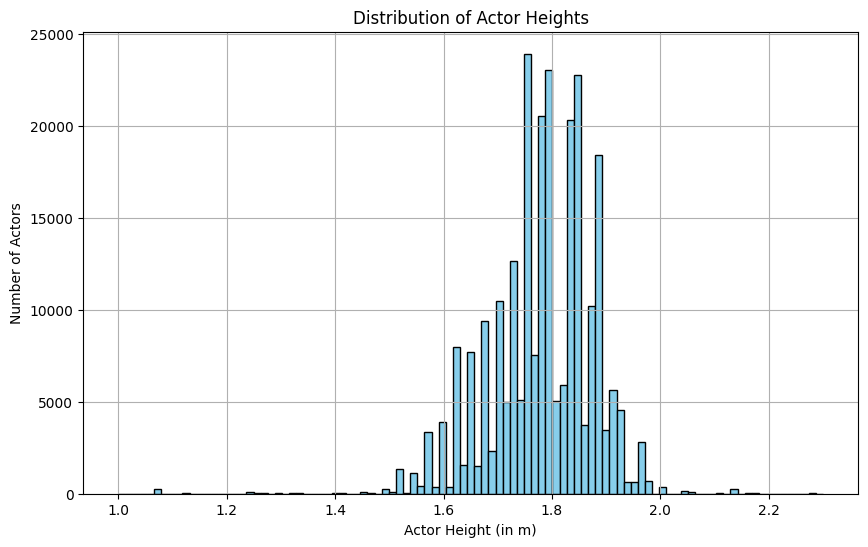

In [443]:
plt.figure(figsize=(10, 6))

# We think it is reasonable to start at 1m for actors and look up to 2.3m
plt.hist(correlation_data['ActorHeight'], bins=np.linspace(1, 2.3, 100), edgecolor='black', color='skyblue')  
plt.title('Distribution of Actor Heights')
plt.xlabel('Actor Height (in m)')
plt.ylabel('Number of Actors')
plt.grid(True)
plt.show()

/var/folders/pq/vs1ny6651qz1x3k8m4bz09m40000gn/T/ipykernel_71877/2962312624.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['HeightCategory'] = pd.cut(filtered_data['ActorHeight'], bins=height_bins, labels=height_labels, right=False)
/var/folders/pq/vs1ny6651qz1x3k8m4bz09m40000gn/T/ipykernel_71877/2962312624.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  height_summary = filtered_data.groupby('HeightCategory')[['BoxOfficeRevenue', 'averageRating', 'metascore_metacritic']].max()


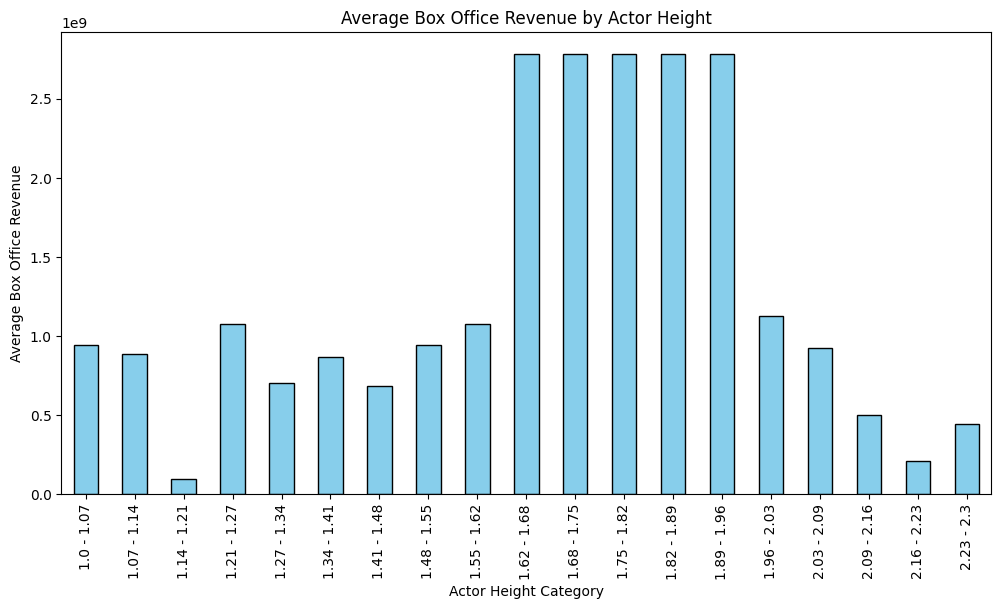

In [444]:
# To establish the link between the actor's height and the parameter we first filter to keep the heights between 1m and to 2.3m
filtered_data = correlation_data[(correlation_data['ActorHeight'] >= 1) & (correlation_data['ActorHeight'] <= 2.3)]

# Now we define 20 bins which are the categorizes/ranges we will put the actors in as we cannot check individual for each height
height_bins = np.linspace(1, 2.3, 20)  # 20 bins between 1m and 2.3m
height_labels = [f"{round(height_bins[i], 2)} - {round(height_bins[i+1], 2)}" for i in range(len(height_bins)-1)]  # Labels for bins

filtered_data['HeightCategory'] = pd.cut(filtered_data['ActorHeight'], bins=height_bins, labels=height_labels, right=False)
height_summary = filtered_data.groupby('HeightCategory')[['BoxOfficeRevenue', 'averageRating', 'metascore_metacritic']].max()

height_summary.head(15)

# Bar plot for BoxOfficeRevenue by height category
plt.figure(figsize=(12, 6))
height_summary['BoxOfficeRevenue'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Box Office Revenue by Actor Height')
plt.xlabel('Actor Height Category')
plt.ylabel('Average Box Office Revenue')
plt.show()

In [445]:
# Now we identify the height category leading to the largest boxoffice revnue, highest averageRating and better metascore_metacritic
max_box_office_height = height_summary['BoxOfficeRevenue'].idxmax() #idmax gives index associated with the max value, ex : gives the height associated with the largest boxofficerev
max_avg_rating_height = height_summary['averageRating'].idxmax()
max_metascore_height = height_summary['metascore_metacritic'].idxmax()

print(f"Height category with largest Box Office Revenue: {max_box_office_height}")
print(f"Height category with highest Average Rating: {max_avg_rating_height}")
print(f"Height category with better Metascore (Metacritic): {max_metascore_height}")


Height category with largest Box Office Revenue: 1.62 - 1.68
Height category with highest Average Rating: 1.62 - 1.68
Height category with better Metascore (Metacritic): 1.55 - 1.62


## Interpretation of the general analysis


We first conducted a general analysis without differentiating between gender. We observe that the box office revenue is the highest for heights between 1.62 to 1.96. However we could see in this plot that it wasn't the best option to identify the relationship between height and box office. Let's not forget that male and female heights are not distributed the same way. Additionally, when exploring our dataset we observed a clear difference in the number of actors vs actresses, Thus, to have a more precise and less biased analysis we have done the analysis for both male and female separately in the following part.

## Gender categorization


In [488]:
male_df=correlation_data[correlation_data['ActorGender']=='M']
female_df=correlation_data[correlation_data['ActorGender']=='F']

male_df


,WikipediaMovieID,BoxOfficeRevenue,averageRating,metascore_metacritic,ActorHeight,ActorAgeAtRelease,ActorGender
2,975900,14010832.0,4.9,35.0,1.727,32.0,M
3,975900,14010832.0,4.9,35.0,1.750,33.0,M
8,975900,14010832.0,4.9,35.0,1.892,30.0,M
22,975900,14010832.0,4.9,35.0,1.800,57.0,M
425,171005,10161099.0,7.5,83.0,1.770,28.0,M
...,...,...,...,...,...,...,...
2502596,1918494,6944471.0,6.7,75.0,1.770,33.0,M
2502597,1918494,6944471.0,6.7,75.0,1.800,42.0,M
2502598,1918494,6944471.0,6.7,75.0,1.800,42.0,M
2502600,1918494,6944471.0,6.7,75.0,1.700,45.0,M


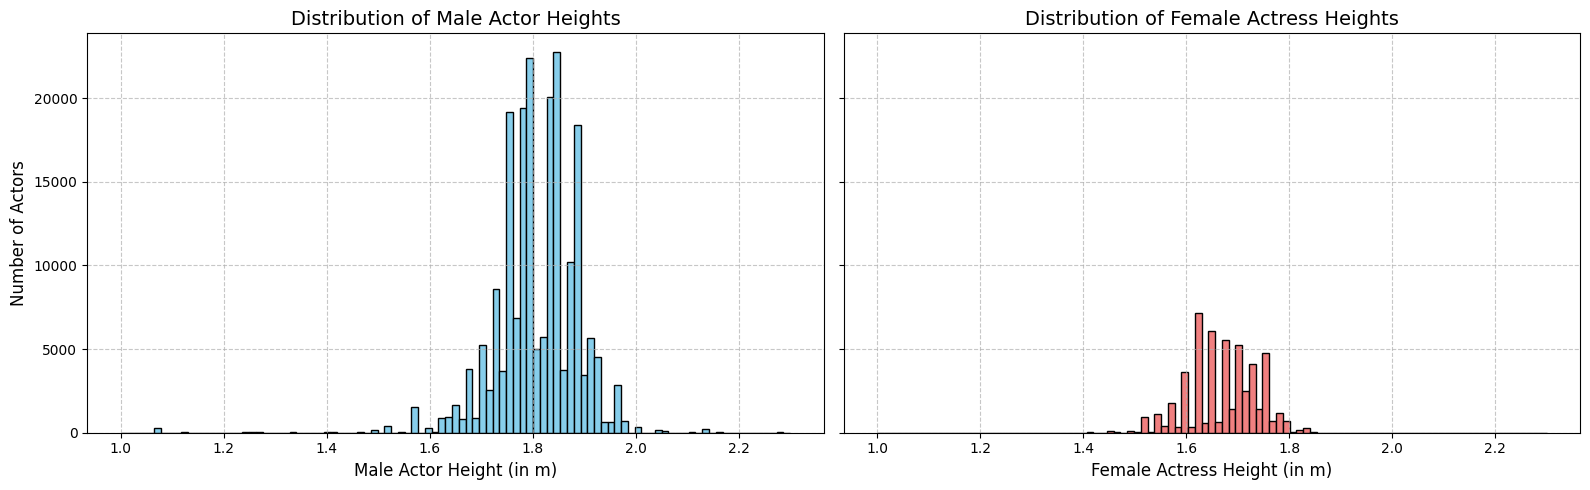

In [489]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Plot Histogram for Male Actor Heights
axes[0].hist(
    male_df['ActorHeight'],
    bins=np.linspace(1, 2.3, 100),
    edgecolor='black',
    color='skyblue'
)
axes[0].set_title('Distribution of Male Actor Heights', fontsize=14)
axes[0].set_xlabel('Male Actor Height (in m)', fontsize=12)
axes[0].set_ylabel('Number of Actors', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot Histogram for Female Actor Heights
axes[1].hist(
    female_df['ActorHeight'],
    bins=np.linspace(1, 2.3, 100),
    edgecolor='black',
    color='lightcoral'
)
axes[1].set_title('Distribution of Female Actress Heights', fontsize=14)
axes[1].set_xlabel('Female Actress Height (in m)', fontsize=12)
# No need to set ylabel for the second plot since it's shared
axes[1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

This plot confirms that there are way more actors than actresses.

In [490]:
# MALE
# To establish the link between the actor's height and the parameter we first filter to keep the heights between 1m and to 2.3m
filtered_data_male = male_df[(male_df['ActorHeight'] >= 1) & (male_df['ActorHeight'] <= 2.3)]

# Now we define 50 bins which are the categorizes/ranges we will put the actors in as we cannot check individual for each height
height_bins = np.linspace(1, 2.3, 20)  # 20 bins between 1m and 2.3m
height_labels = [f"{round(height_bins[i], 2)} - {round(height_bins[i+1], 2)}" for i in range(len(height_bins)-1)]  # Labels for bins

filtered_data_male['HeightCategory'] = pd.cut(filtered_data_male['ActorHeight'], bins=height_bins, labels=height_labels, right=False)
height_summary_male = filtered_data_male.groupby('HeightCategory')[['BoxOfficeRevenue', 'averageRating', 'metascore_metacritic']].max()

/var/folders/pq/vs1ny6651qz1x3k8m4bz09m40000gn/T/ipykernel_71877/949127210.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_male['HeightCategory'] = pd.cut(filtered_data_male['ActorHeight'], bins=height_bins, labels=height_labels, right=False)
/var/folders/pq/vs1ny6651qz1x3k8m4bz09m40000gn/T/ipykernel_71877/949127210.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  height_summary_male = filtered_data_male.groupby('HeightCategory')[['BoxOfficeRevenue', 'averageRating', 'metascore_metacritic']].max()


In [512]:
# FEMALE
# To establish the link between the actor's height and the parameter we first filter to keep the heights between 1m and to 2.3m
filtered_data_female = female_df[(female_df['ActorHeight'] >= 1) & (female_df['ActorHeight'] <= 2.3)]

filtered_data_female['HeightCategory'] = pd.cut(filtered_data_female['ActorHeight'], bins=height_bins, labels=height_labels, right=False)
height_summary_female = filtered_data_female.groupby('HeightCategory')[['BoxOfficeRevenue', 'averageRating', 'metascore_metacritic']].max()

/var/folders/pq/vs1ny6651qz1x3k8m4bz09m40000gn/T/ipykernel_71877/3775621854.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  height_summary_female = filtered_data_female.groupby('HeightCategory')[['BoxOfficeRevenue', 'averageRating', 'metascore_metacritic']].max()


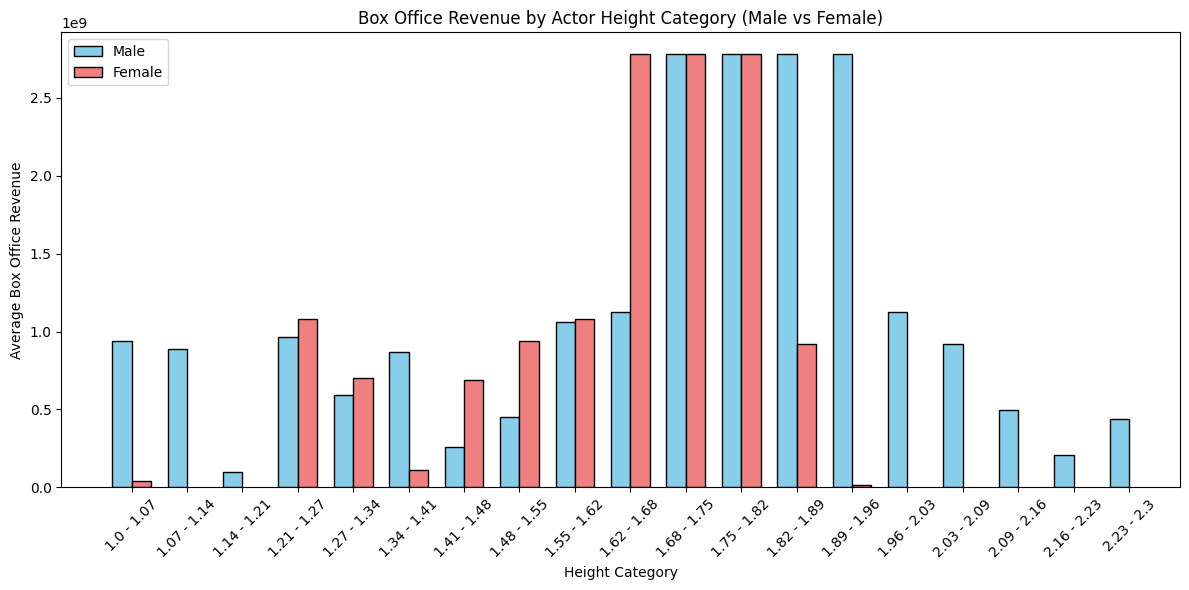

In [514]:
# We plot for both male and female on the same graph to do a gender comparison
plt.figure(figsize=(12, 6))

# Define the width of the bars
bar_width = 0.35

# Get the positions for male and female bars
male_positions = np.arange(len(height_summary_male))
female_positions = male_positions + bar_width  # Shift female bars to the right

# Plot Male Actor Height vs Box Office Revenue
plt.bar(male_positions, height_summary_male['BoxOfficeRevenue'], width=bar_width, color='skyblue', edgecolor='black', label='Male')

# Plot Female Actress Height vs Box Office Revenue
plt.bar(female_positions, height_summary_female['BoxOfficeRevenue'], width=bar_width, color='lightcoral', edgecolor='black', label='Female')

# Title and labels
plt.title('Box Office Revenue by Actor Height Category (Male vs Female)')
plt.xlabel('Height Category')
plt.ylabel('Average Box Office Revenue')
plt.xticks(male_positions + bar_width / 2, height_summary_male.index, rotation=45)  # Set x-tick labels
plt.legend()  

plt.tight_layout()  
plt.show()

We can see that the highest box office revenue for actresses is associated with heights between 1.62m to 1.82m while for actors it is a bit shifted towards higher heights : between 1.68m to 1.96m.

The abscissa value of the Male Gaussian peak is: 1.82 m. Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



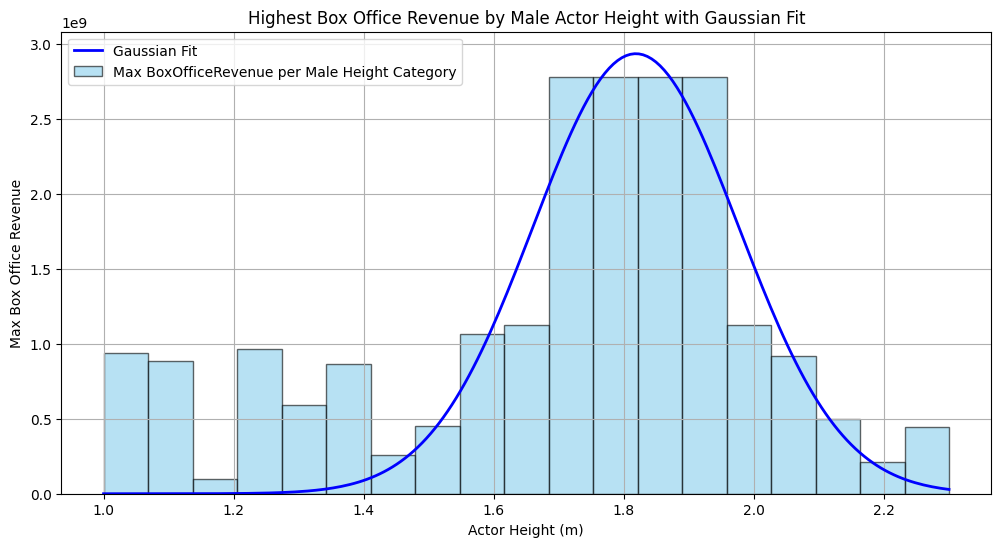

In [536]:
# MALE Gaussian fitting starts here
# Step 1: Extract histogram values, ensuring alignment with height_labels
hist_values_male = height_summary_male['BoxOfficeRevenue'].reindex(height_labels).fillna(0).values

# Step 2: Calculate bin centers for the height bins
bin_edges = height_bins
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Step 3: Define the Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(- (x - mu)**2 / (2 * sigma**2))

# Step 4: Calculate initial parameter guesses
mean_height_male = filtered_data_male['ActorHeight'].mean()
std_height_male = filtered_data_male['ActorHeight'].std()
A1 = hist_values_male.max()  # Initial guess for amplitude
mu1 = mean_height_male       # Initial guess for mean
sigma1 = std_height_male     # Initial guess for standard deviation

# Step 5: Fit the Gaussian function to the histogram data
try:
    popt, pcov = curve_fit(gaussian, bin_centers, hist_values_male, p0=[A1, mu1, sigma1])
    A_fit, mu_fit, sigma_fit = popt
except RuntimeError:
    print("Error: Gaussian fit did not converge.")
    A_fit, mu_fit, sigma_fit = [np.nan, np.nan, np.nan]

# Step 6: Generate x-values for plotting the Gaussian curve
x_fit_m = np.linspace(1, 2.3, 200)
y_fit_m = gaussian(x_fit_m, A_fit, mu_fit, sigma_fit)

print(f"The abscissa value of the Male Gaussian peak is: {mu_fit:.2f} m. ")

# Step 7: Plot the histogram and Gaussian fit
plt.figure(figsize=(12, 6))
plt.bar(
    bin_centers,
    hist_values_male,
    width=(bin_edges[1] - bin_edges[0]),
    color='skyblue',
    edgecolor='black',
    alpha=0.6,
    label='Max BoxOfficeRevenue per Male Height Category',
    align='center'
)
plt.plot(x_fit_m, y_fit_m, 'b', linewidth=2, label='Gaussian Fit')
plt.title('Highest Box Office Revenue by Male Actor Height with Gaussian Fit')
plt.xlabel('Actor Height (m)')
plt.ylabel('Max Box Office Revenue')
plt.legend()
plt.grid(True)
plt.show()

We observe that the distribution of the maximum box office revenue as a function of male actor height seems to follow a gaussian distribution. Even if the distribution is spread in the range of 1.68 to 1.96 we obtain a peak around 1.82 m. Even though we can not confirm the correlation between an actor height and the movie box office revenue, the gaussian fit tells us that there is a "prefered" heigth. Compared to the world average male height 1.7145m, in the movie industry actors with the highest box office revenue tend to be taller.

The abscissa value of the Female Gaussian peak is: 1.71 m. Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



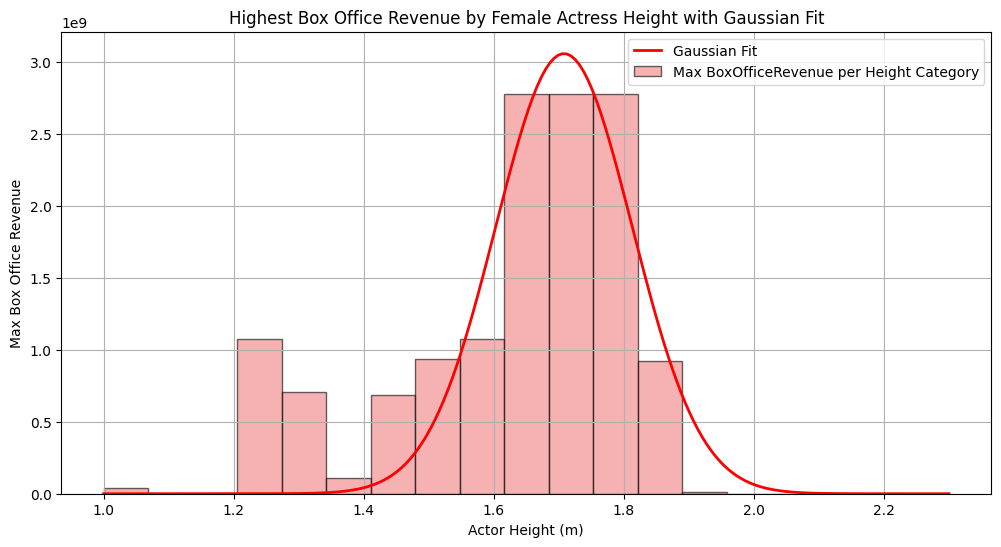

In [535]:
# FEMALE Gaussian fitting starts here
# Step 1: Extract histogram values, ensuring alignment with height_labels
hist_values = height_summary_female['BoxOfficeRevenue'].reindex(height_labels).fillna(0).values

# Step 2: Calculate bin centers for the height bins
bin_edges = height_bins
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Step 3: Define the Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(- (x - mu)**2 / (2 * sigma**2))

# Step 4: Calculate initial parameter guesses
mean_height = filtered_data_female['ActorHeight'].mean()
std_height = filtered_data_female['ActorHeight'].std()
A0 = hist_values.max()  # Initial guess for amplitude
mu0 = mean_height       # Initial guess for mean
sigma0 = std_height     # Initial guess for standard deviation

# Step 5: Fit the Gaussian function to the histogram data
try:
    popt, pcov = curve_fit(gaussian, bin_centers, hist_values, p0=[A0, mu0, sigma0])
    A_fit, mu_fit, sigma_fit = popt
except RuntimeError:
    print("Error: Gaussian fit did not converge.")
    A_fit, mu_fit, sigma_fit = [np.nan, np.nan, np.nan]

# Step 6: Generate x-values for plotting the Gaussian curve
x_fit = np.linspace(1, 2.3, 200)
y_fit = gaussian(x_fit, A_fit, mu_fit, sigma_fit)

print(f"The abscissa value of the Female Gaussian peak is: {mu_fit:.2f} m. ")


# Step 7: Plot the histogram and Gaussian fit
plt.figure(figsize=(12, 6))
plt.bar(
    bin_centers,
    hist_values,
    width=(bin_edges[1] - bin_edges[0]),
    color='lightcoral',
    edgecolor='black',
    alpha=0.6,
    label='Max BoxOfficeRevenue per Height Category',
    align='center'
)
plt.plot(x_fit, y_fit, 'r-', linewidth=2, label='Gaussian Fit')
plt.title('Highest Box Office Revenue by Female Actress Height with Gaussian Fit')
plt.xlabel('Actor Height (m)')
plt.ylabel('Max Box Office Revenue')
plt.legend()
plt.grid(True)
plt.show()

We observe that the distribution of the maximum box office revenue as a function of female actor height seems to follow a gaussian distribution. Even if the distribution is spread in the range of 1.62m to 1.82m we obtain a peak around 1.71 m. Even though we can not confirm the correlation between an actor height and the movie box office revenue, the gaussian fit tells us that there is a "prefered" heigth also for female. Compared to the world average female height 1.60m, in the movie industry actresses with the highest box office revenue tend to be taller.

To conclude, this was a brief analysis of the height impact on the box office revenue. The box office revenue is only one of the various parameters evaluating an actor's success. For the 3rd phase of the project we will further and deeper analyze all the parameters and the actor's traits associated with the highest success metrics. This will allow us to establish a list of factors apart from the acting talent itself that contributes to an actor's success.

# Age analysis without gender category

In [517]:
print(correlation_data['ActorAgeAtRelease'].describe())

count    256590.000000
mean         40.215192
std          14.513455
min         -48.000000
25%          30.000000
50%          38.000000
75%          50.000000
max          95.000000
Name: ActorAgeAtRelease, dtype: float64


We can see a clear outlier in the minimum age of -48. However it is not relevant since we will consider ages from 0.

In [539]:
'''plt.figure(figsize=(10, 6))

plt.hist(correlation_data['ActorAgeAtRelease'], bins=np.linspace(0, 105, 100), edgecolor='black', color='skyblue')  
plt.title('Distribution of Actor Ages')
plt.xlabel('Actor Age At Release')
plt.ylabel('Number of Actors')
plt.grid(True)
plt.show()'''

"plt.figure(figsize=(10, 6))\n\nplt.hist(correlation_data['ActorAgeAtRelease'], bins=np.linspace(0, 105, 100), edgecolor='black', color='skyblue')  \nplt.title('Distribution of Actor Ages')\nplt.xlabel('Actor Age At Release')\nplt.ylabel('Number of Actors')\nplt.grid(True)\nplt.show()"

In [519]:
filtered_data2 = correlation_data[(correlation_data['ActorAgeAtRelease'] >= 0) & (correlation_data['ActorAgeAtRelease'] <= 105)]

In [520]:
# Now we define 20 bins which are the categorizes/ranges we will put the actors in as we cannot check individual for each age
age_bins = np.linspace(0, 100, 21)  # 20 bins between 0 and 100 year
age_labels = [f"{round(age_bins[i], 2)} - {round(age_bins[i+1], 2)}" for i in range(len(age_bins)-1)]  # Labels for bins

filtered_data2['AgeCategory'] = pd.cut(filtered_data2['ActorAgeAtRelease'], bins=age_bins, labels=age_labels, right=False)
age_summary = filtered_data2.groupby('AgeCategory')[['BoxOfficeRevenue', 'averageRating', 'metascore_metacritic']].max()

age_summary.head(15)

/var/folders/pq/vs1ny6651qz1x3k8m4bz09m40000gn/T/ipykernel_71877/3806071476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2['AgeCategory'] = pd.cut(filtered_data2['ActorAgeAtRelease'], bins=age_bins, labels=age_labels, right=False)
/var/folders/pq/vs1ny6651qz1x3k8m4bz09m40000gn/T/ipykernel_71877/3806071476.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_summary = filtered_data2.groupby('AgeCategory')[['BoxOfficeRevenue', 'averageRating', 'metascore_metacritic']].max()


,BoxOfficeRevenue,averageRating,metascore_metacritic
AgeCategory,,,
0.0 - 5.0,5.917456e+08,9.2,100.0
5.0 - 10.0,9.211112e+08,8.8,91.0
10.0 - 15.0,1.078009e+09,9.1,99.0
15.0 - 20.0,9.398859e+08,9.1,99.0
20.0 - 25.0,1.123747e+09,9.1,100.0
25.0 - 30.0,1.123747e+09,9.3,100.0
30.0 - 35.0,2.782275e+09,9.2,100.0
35.0 - 40.0,2.782275e+09,9.3,100.0
40.0 - 45.0,1.123747e+09,9.5,100.0


In [541]:
'''# Bar plot for BoxOfficeRevenue by age category
plt.figure(figsize=(12, 6))
age_summary['BoxOfficeRevenue'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Maximum Box Office Revenue by Actor Age')
plt.xlabel('Actor Age Category')
plt.ylabel('Average Box Office Revenue')
plt.show()

# Bar plot for Average Rating by age category
plt.figure(figsize=(12, 6))
age_summary['averageRating'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Max Average Rating by Actor Age')
plt.xlabel('Actor Age Category')
plt.ylabel('Max Average Rating')
plt.show()

# Bar plot for Metascore by age category
plt.figure(figsize=(12, 6))
age_summary['metascore_metacritic'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Max metascore by Actor Age')
plt.xlabel('Actor Age Category')
plt.ylabel('Max metascore')
plt.show()'''

"# Bar plot for BoxOfficeRevenue by age category\nplt.figure(figsize=(12, 6))\nage_summary['BoxOfficeRevenue'].plot(kind='bar', color='skyblue', edgecolor='black')\nplt.title('Maximum Box Office Revenue by Actor Age')\nplt.xlabel('Actor Age Category')\nplt.ylabel('Average Box Office Revenue')\nplt.show()\n\n# Bar plot for Average Rating by age category\nplt.figure(figsize=(12, 6))\nage_summary['averageRating'].plot(kind='bar', color='skyblue', edgecolor='black')\nplt.title('Max Average Rating by Actor Age')\nplt.xlabel('Actor Age Category')\nplt.ylabel('Max Average Rating')\nplt.show()\n\n# Bar plot for Metascore by age category\nplt.figure(figsize=(12, 6))\nage_summary['metascore_metacritic'].plot(kind='bar', color='skyblue', edgecolor='black')\nplt.title('Max metascore by Actor Age')\nplt.xlabel('Actor Age Category')\nplt.ylabel('Max metascore')\nplt.show()"

### Female


In [538]:
'''plt.figure(figsize=(10, 6))

plt.hist(female_df['ActorAgeAtRelease'], bins=np.linspace(0, 105, 100), edgecolor='black', color='skyblue')  
plt.title('Distribution of Actress Ages')
plt.xlabel('Actress Age At Release')
plt.ylabel('Number of Actress')
plt.grid(True)
plt.show()'''

"plt.figure(figsize=(10, 6))\n\nplt.hist(female_df['ActorAgeAtRelease'], bins=np.linspace(0, 105, 100), edgecolor='black', color='skyblue')  \nplt.title('Distribution of Actress Ages')\nplt.xlabel('Actress Age At Release')\nplt.ylabel('Number of Actress')\nplt.grid(True)\nplt.show()"

In [525]:
filtered_data_female = female_df[(female_df['ActorAgeAtRelease'] >= 0) & (female_df['ActorAgeAtRelease'] <= 105)]

In [526]:
# Now we define 20 bins which are the categorizes/ranges we will put the actors in as we cannot check individual for each age
age_bins = np.linspace(0, 100, 21)  # 20 bins between 0 and 100 year
age_labels = [f"{round(age_bins[i], 2)} - {round(age_bins[i+1], 2)}" for i in range(len(age_bins)-1)]  # Labels for bins

filtered_data_female['AgeCategory'] = pd.cut(filtered_data_female['ActorAgeAtRelease'], bins=age_bins, labels=age_labels, right=False)
age_summary_female = filtered_data_female.groupby('AgeCategory')[['BoxOfficeRevenue', 'averageRating', 'metascore_metacritic']].max()


/var/folders/pq/vs1ny6651qz1x3k8m4bz09m40000gn/T/ipykernel_71877/2801996777.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_female['AgeCategory'] = pd.cut(filtered_data_female['ActorAgeAtRelease'], bins=age_bins, labels=age_labels, right=False)
/var/folders/pq/vs1ny6651qz1x3k8m4bz09m40000gn/T/ipykernel_71877/2801996777.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_summary_female = filtered_data_female.groupby('AgeCategory')[['BoxOfficeRevenue', 'averageRating', 'metascore_metacritic']].max()


In [540]:
'''# Bar plot for BoxOfficeRevenue by age category
plt.figure(figsize=(12, 6))
age_summary_female['BoxOfficeRevenue'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Maximum Box Office Revenue by Actress Age')
plt.xlabel('Actress Age Category')
plt.ylabel('Average Box Office Revenue')
plt.show()

# Bar plot for Average Rating by age category
plt.figure(figsize=(12, 6))
age_summary_female['averageRating'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Max Average Rating by Actress Age')
plt.xlabel('Actress Age Category')
plt.ylabel('Max Average Rating')
plt.show()

# Bar plot for Metascore by age category
plt.figure(figsize=(12, 6))
age_summary_female['metascore_metacritic'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Max metascore by Actor Age')
plt.xlabel('Actor Age Category')
plt.ylabel('Max metascore')
plt.show()'''

"# Bar plot for BoxOfficeRevenue by age category\nplt.figure(figsize=(12, 6))\nage_summary_female['BoxOfficeRevenue'].plot(kind='bar', color='skyblue', edgecolor='black')\nplt.title('Maximum Box Office Revenue by Actress Age')\nplt.xlabel('Actress Age Category')\nplt.ylabel('Average Box Office Revenue')\nplt.show()\n\n# Bar plot for Average Rating by age category\nplt.figure(figsize=(12, 6))\nage_summary_female['averageRating'].plot(kind='bar', color='skyblue', edgecolor='black')\nplt.title('Max Average Rating by Actress Age')\nplt.xlabel('Actress Age Category')\nplt.ylabel('Max Average Rating')\nplt.show()\n\n# Bar plot for Metascore by age category\nplt.figure(figsize=(12, 6))\nage_summary_female['metascore_metacritic'].plot(kind='bar', color='skyblue', edgecolor='black')\nplt.title('Max metascore by Actor Age')\nplt.xlabel('Actor Age Category')\nplt.ylabel('Max metascore')\nplt.show()"